**1/16/24**

Notebook for graphing results of formic acid assays on bacterial cultures.

In [1]:
from elliot_utils import *

In [2]:
analysisPath = Path.cwd().joinpath('analysis_files/formate_assays/')
figPath = Path.cwd().joinpath('figures/formate_assays/')

In [3]:
initP = sns.color_palette('light:b')
myPalette = [initP[0], initP[2], initP[4]]

In [4]:
data11624 = pd.read_csv(analysisPath.joinpath('1-16-24.csv'))

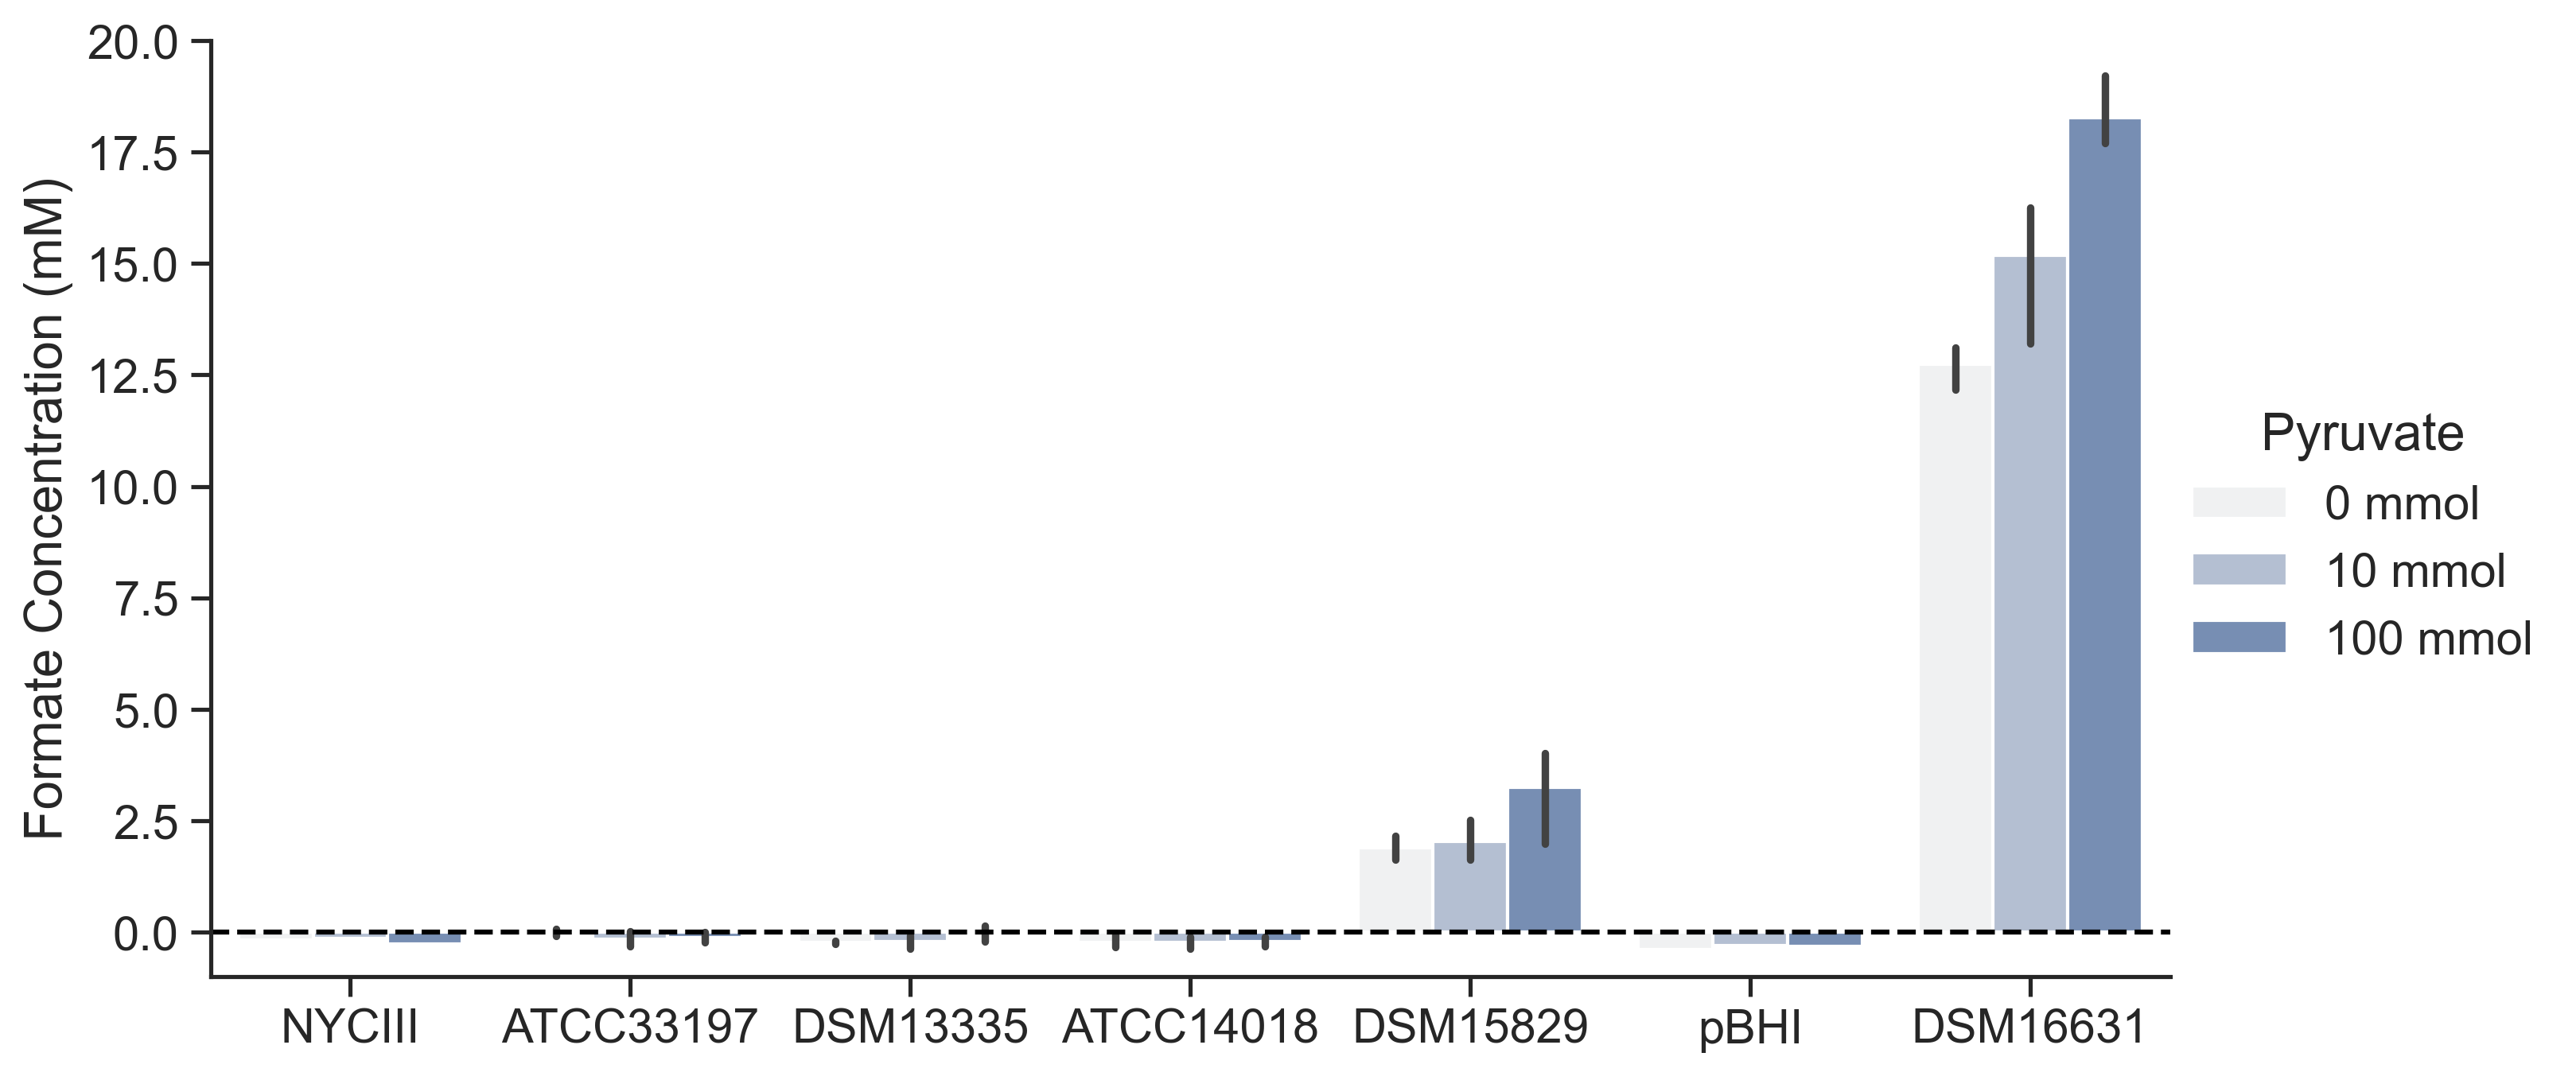

In [5]:
plot11624 = sns.catplot(data=data11624, kind='bar', x='Sample', y='Formate', hue='Pyruvate', aspect=1.9, palette=myPalette)
plot11624.set(ylim=(-1, 20), ylabel='Formate Concentration (mM)', xlabel='')
plt.axhline(0, ls='--', color='black')
plot11624.savefig(figPath.joinpath('1-16-24_result.png'), bbox_inches='tight', dpi=300)

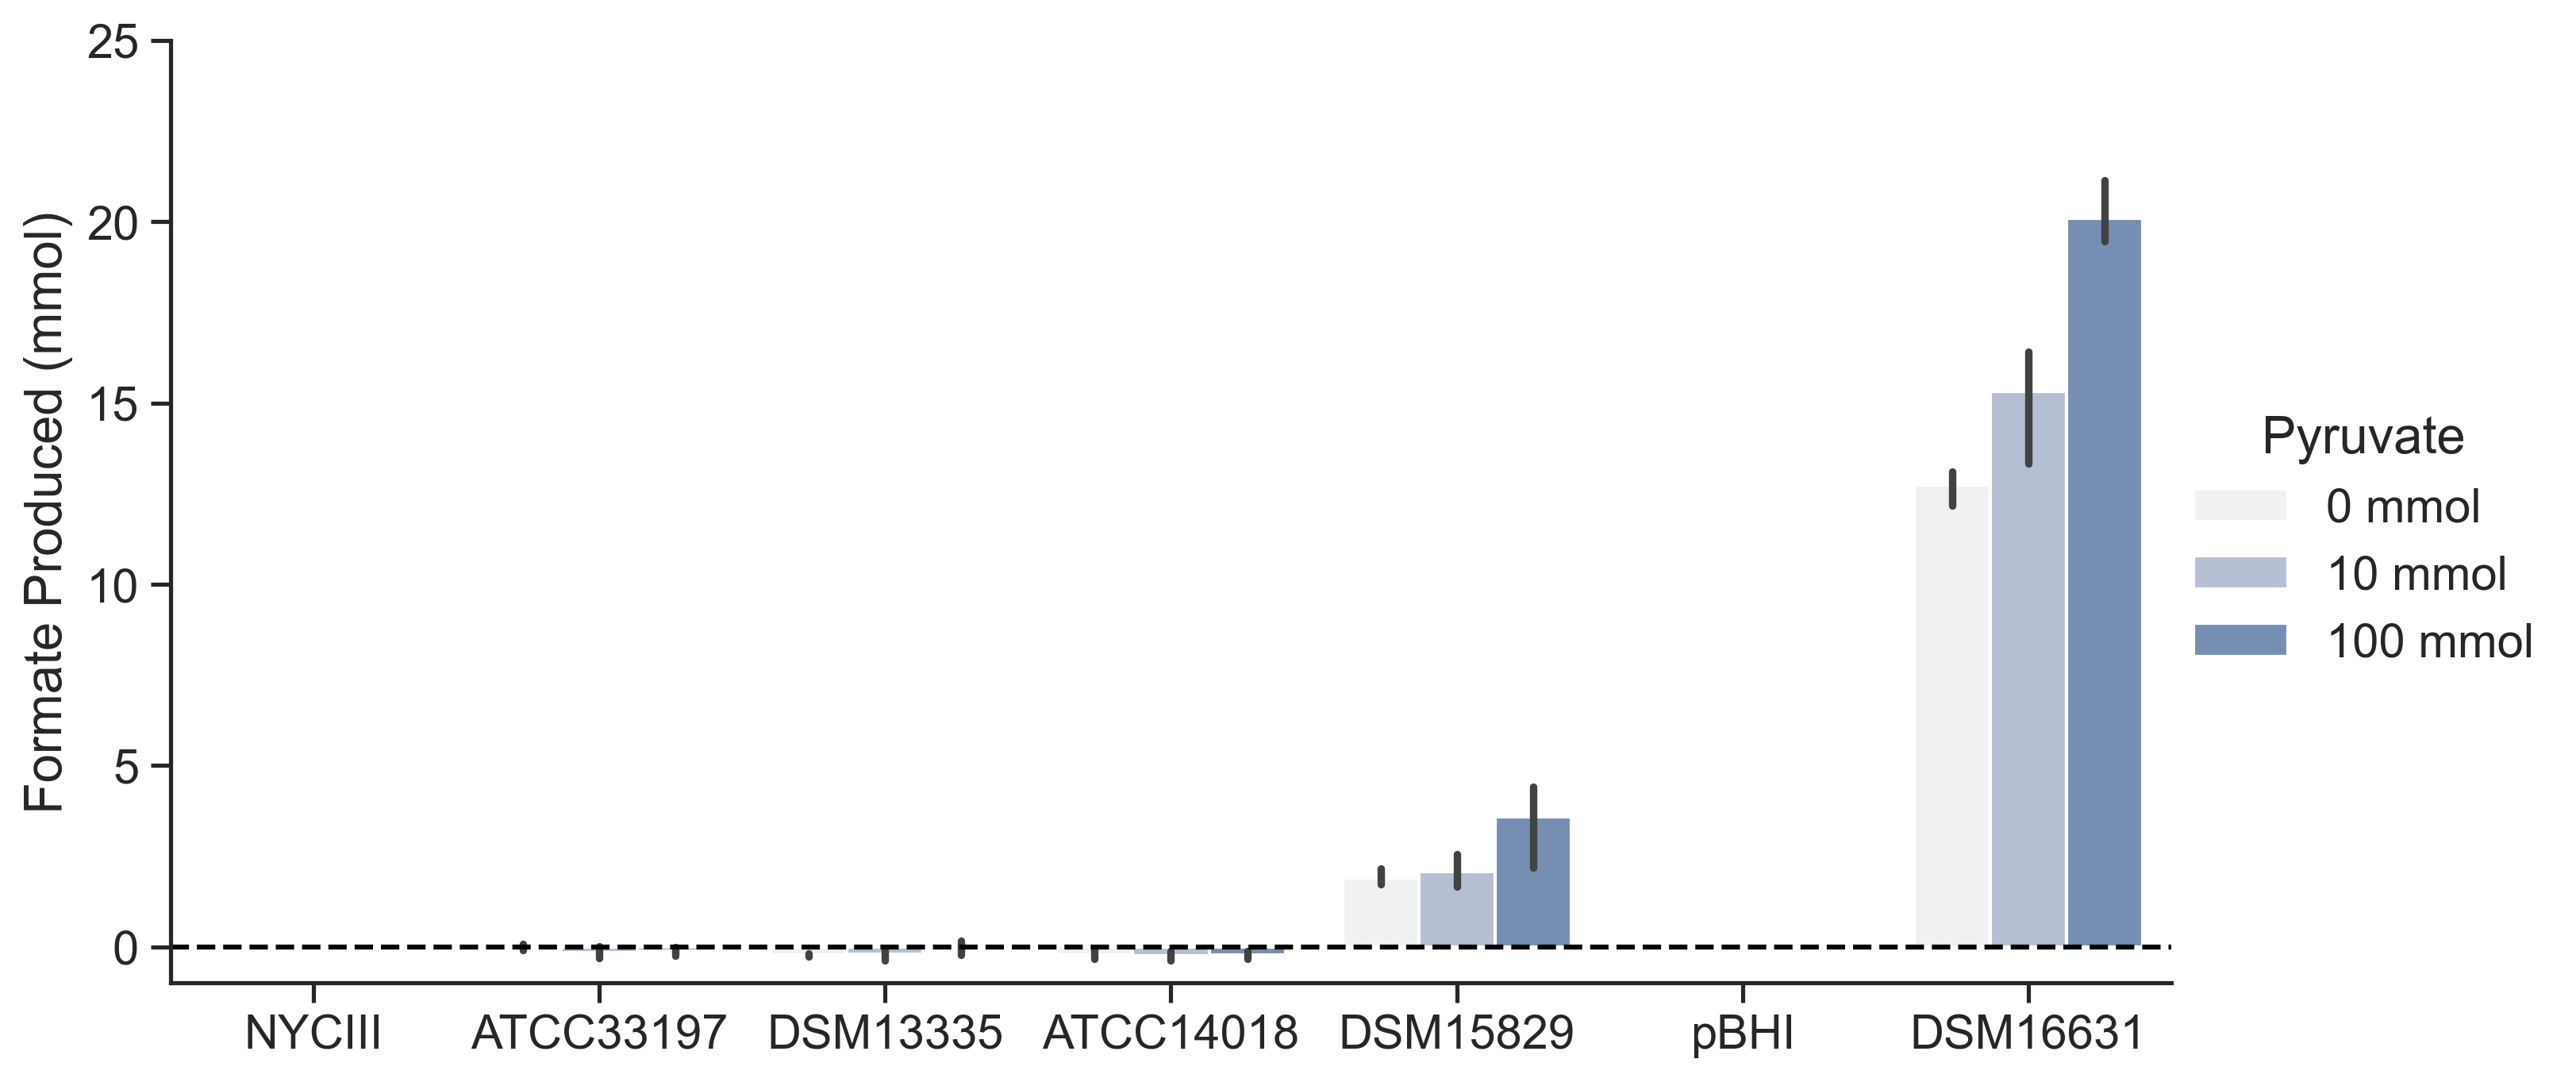

In [20]:
plot11624mass = sns.catplot(data=data11624, kind='bar', x='Sample', y='Mass', hue='Pyruvate', aspect=1.9, palette=myPalette)
plot11624mass.set(ylim=(-1, 25), ylabel='Formate Produced (mmol)', xlabel='')
plt.axhline(0, ls='--', color='black')
plot11624mass.savefig(figPath.joinpath('1-16-24_result_mass.png'), bbox_inches='tight', dpi=300)

In [25]:
data11824 = pd.read_csv(analysisPath.joinpath('1-18-24.csv'))

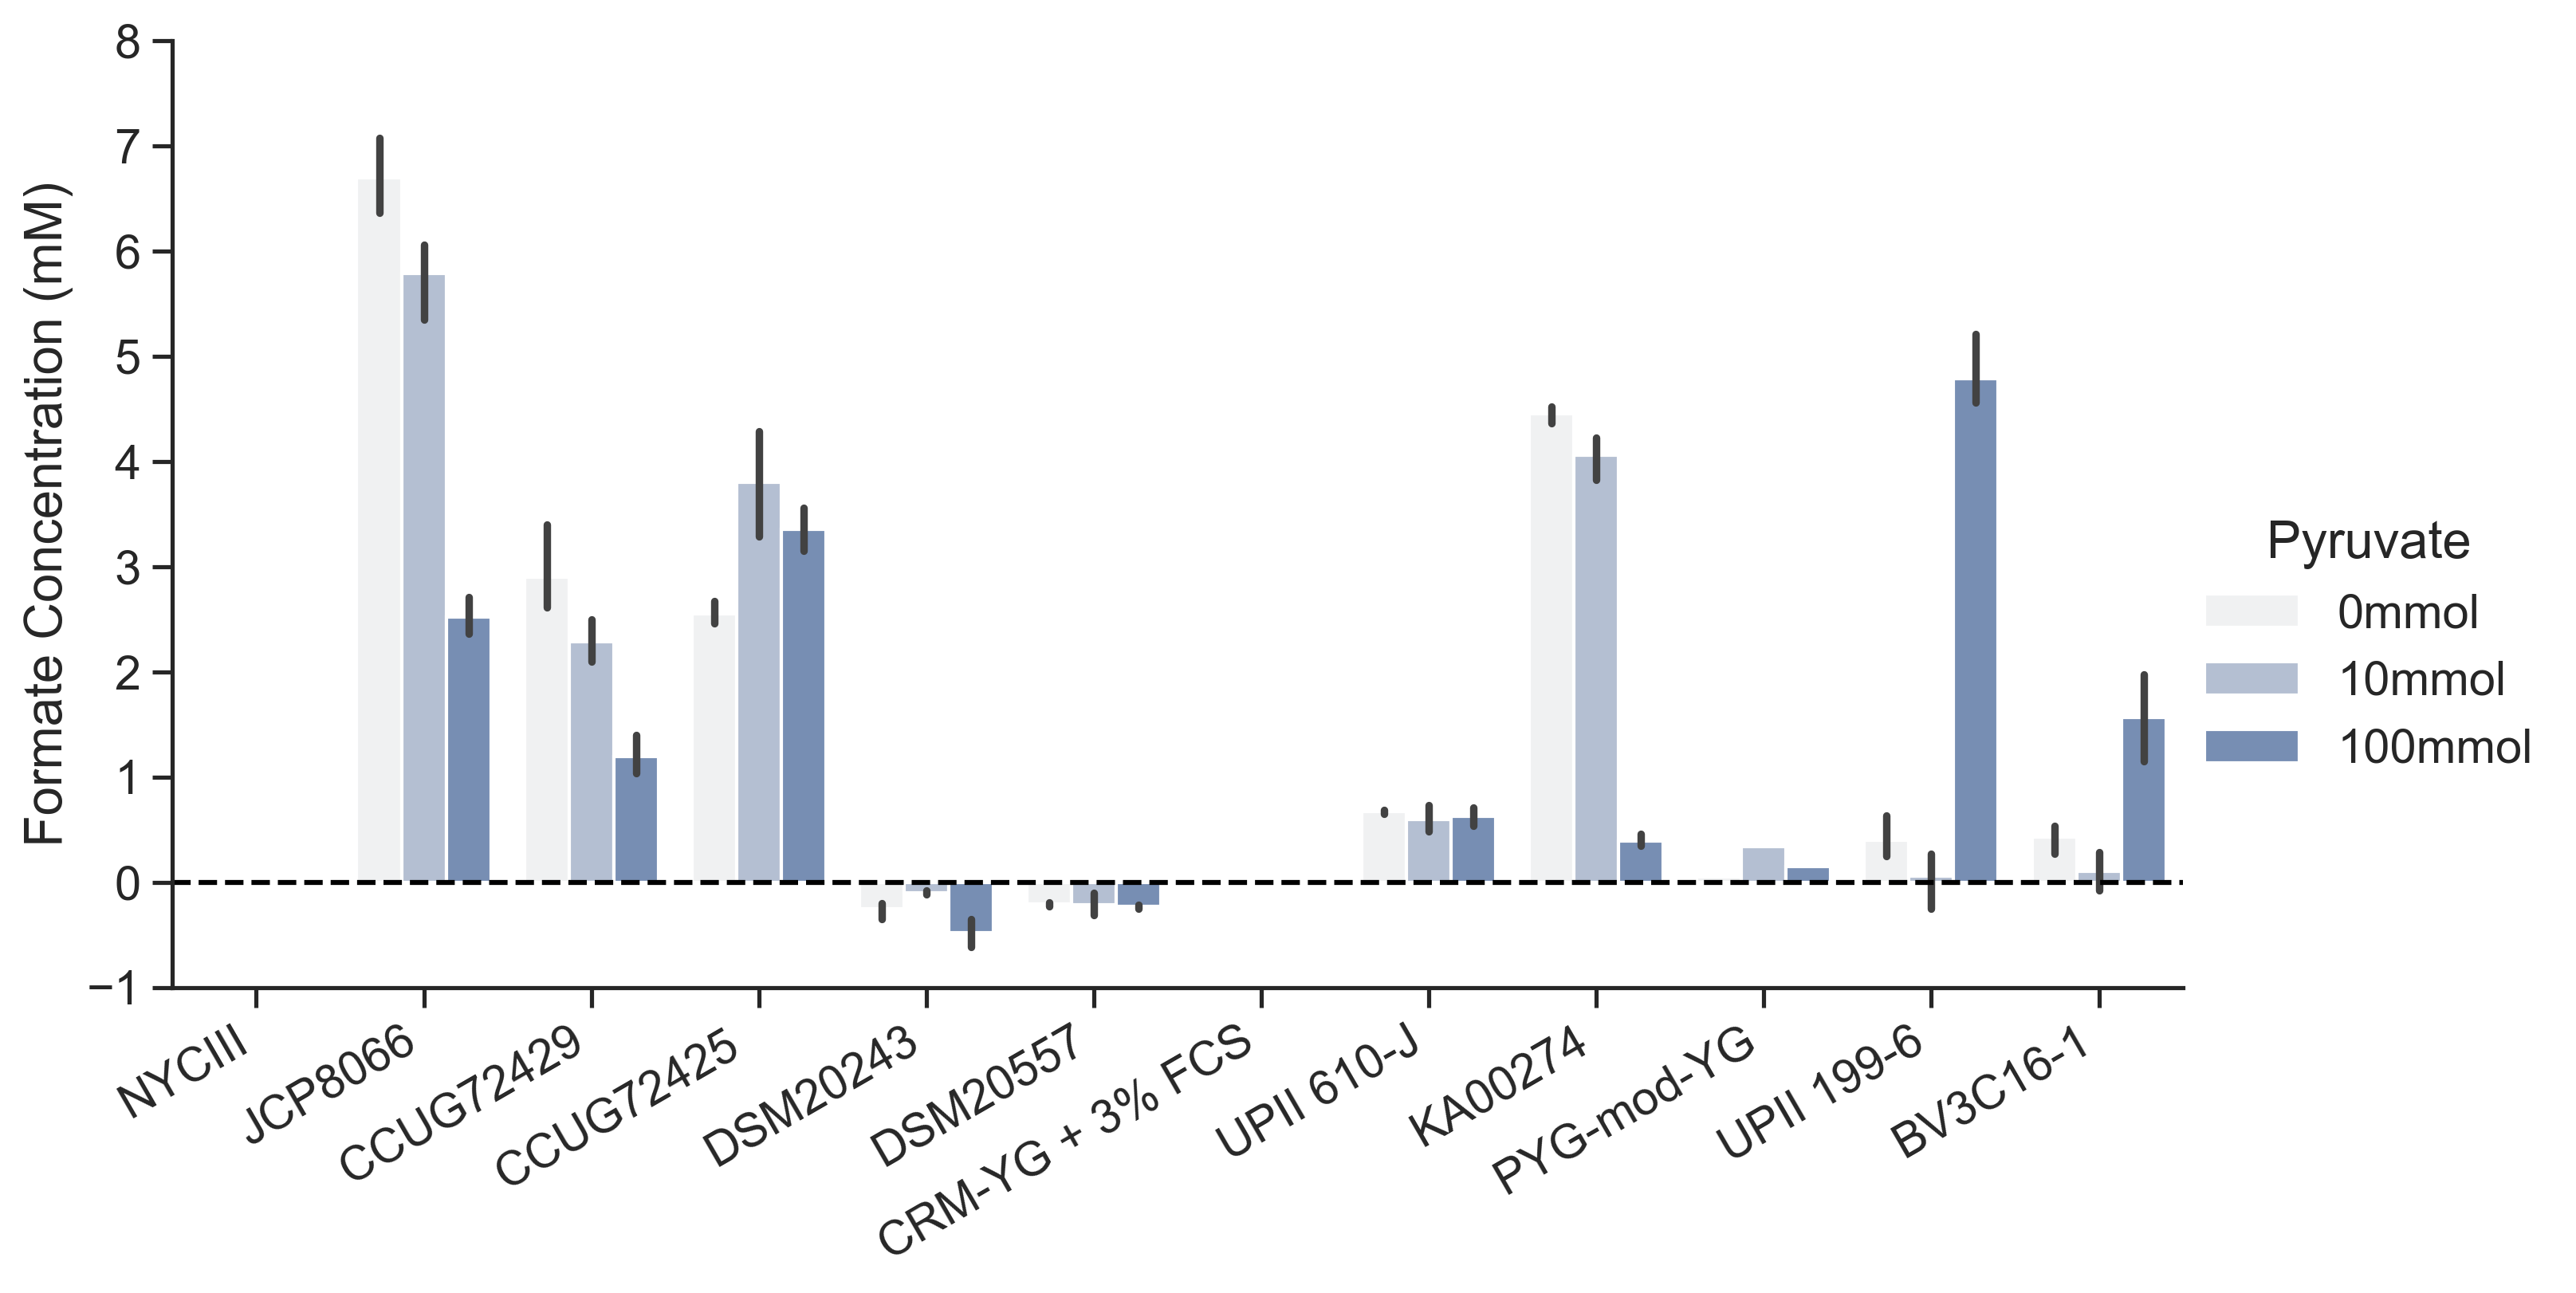

In [30]:
plot11824 = sns.catplot(data=data11824, kind='bar', x='Sample', y='Formate', hue='Pyruvate', aspect=1.9, palette=myPalette)
plot11824.set(ylim=(-1, 8), ylabel='Formate Concentration (mM)', xlabel='')
plt.axhline(0, ls='--', color='black')
plt.xticks(rotation=30, ha='right')
plot11824.savefig(figPath.joinpath('1-18-24_result.png'), bbox_inches='tight', dpi=300)

In [29]:
aggregateData11824 = pd.read_csv(analysisPath.joinpath('1-18-24_aggregate_results.csv'))

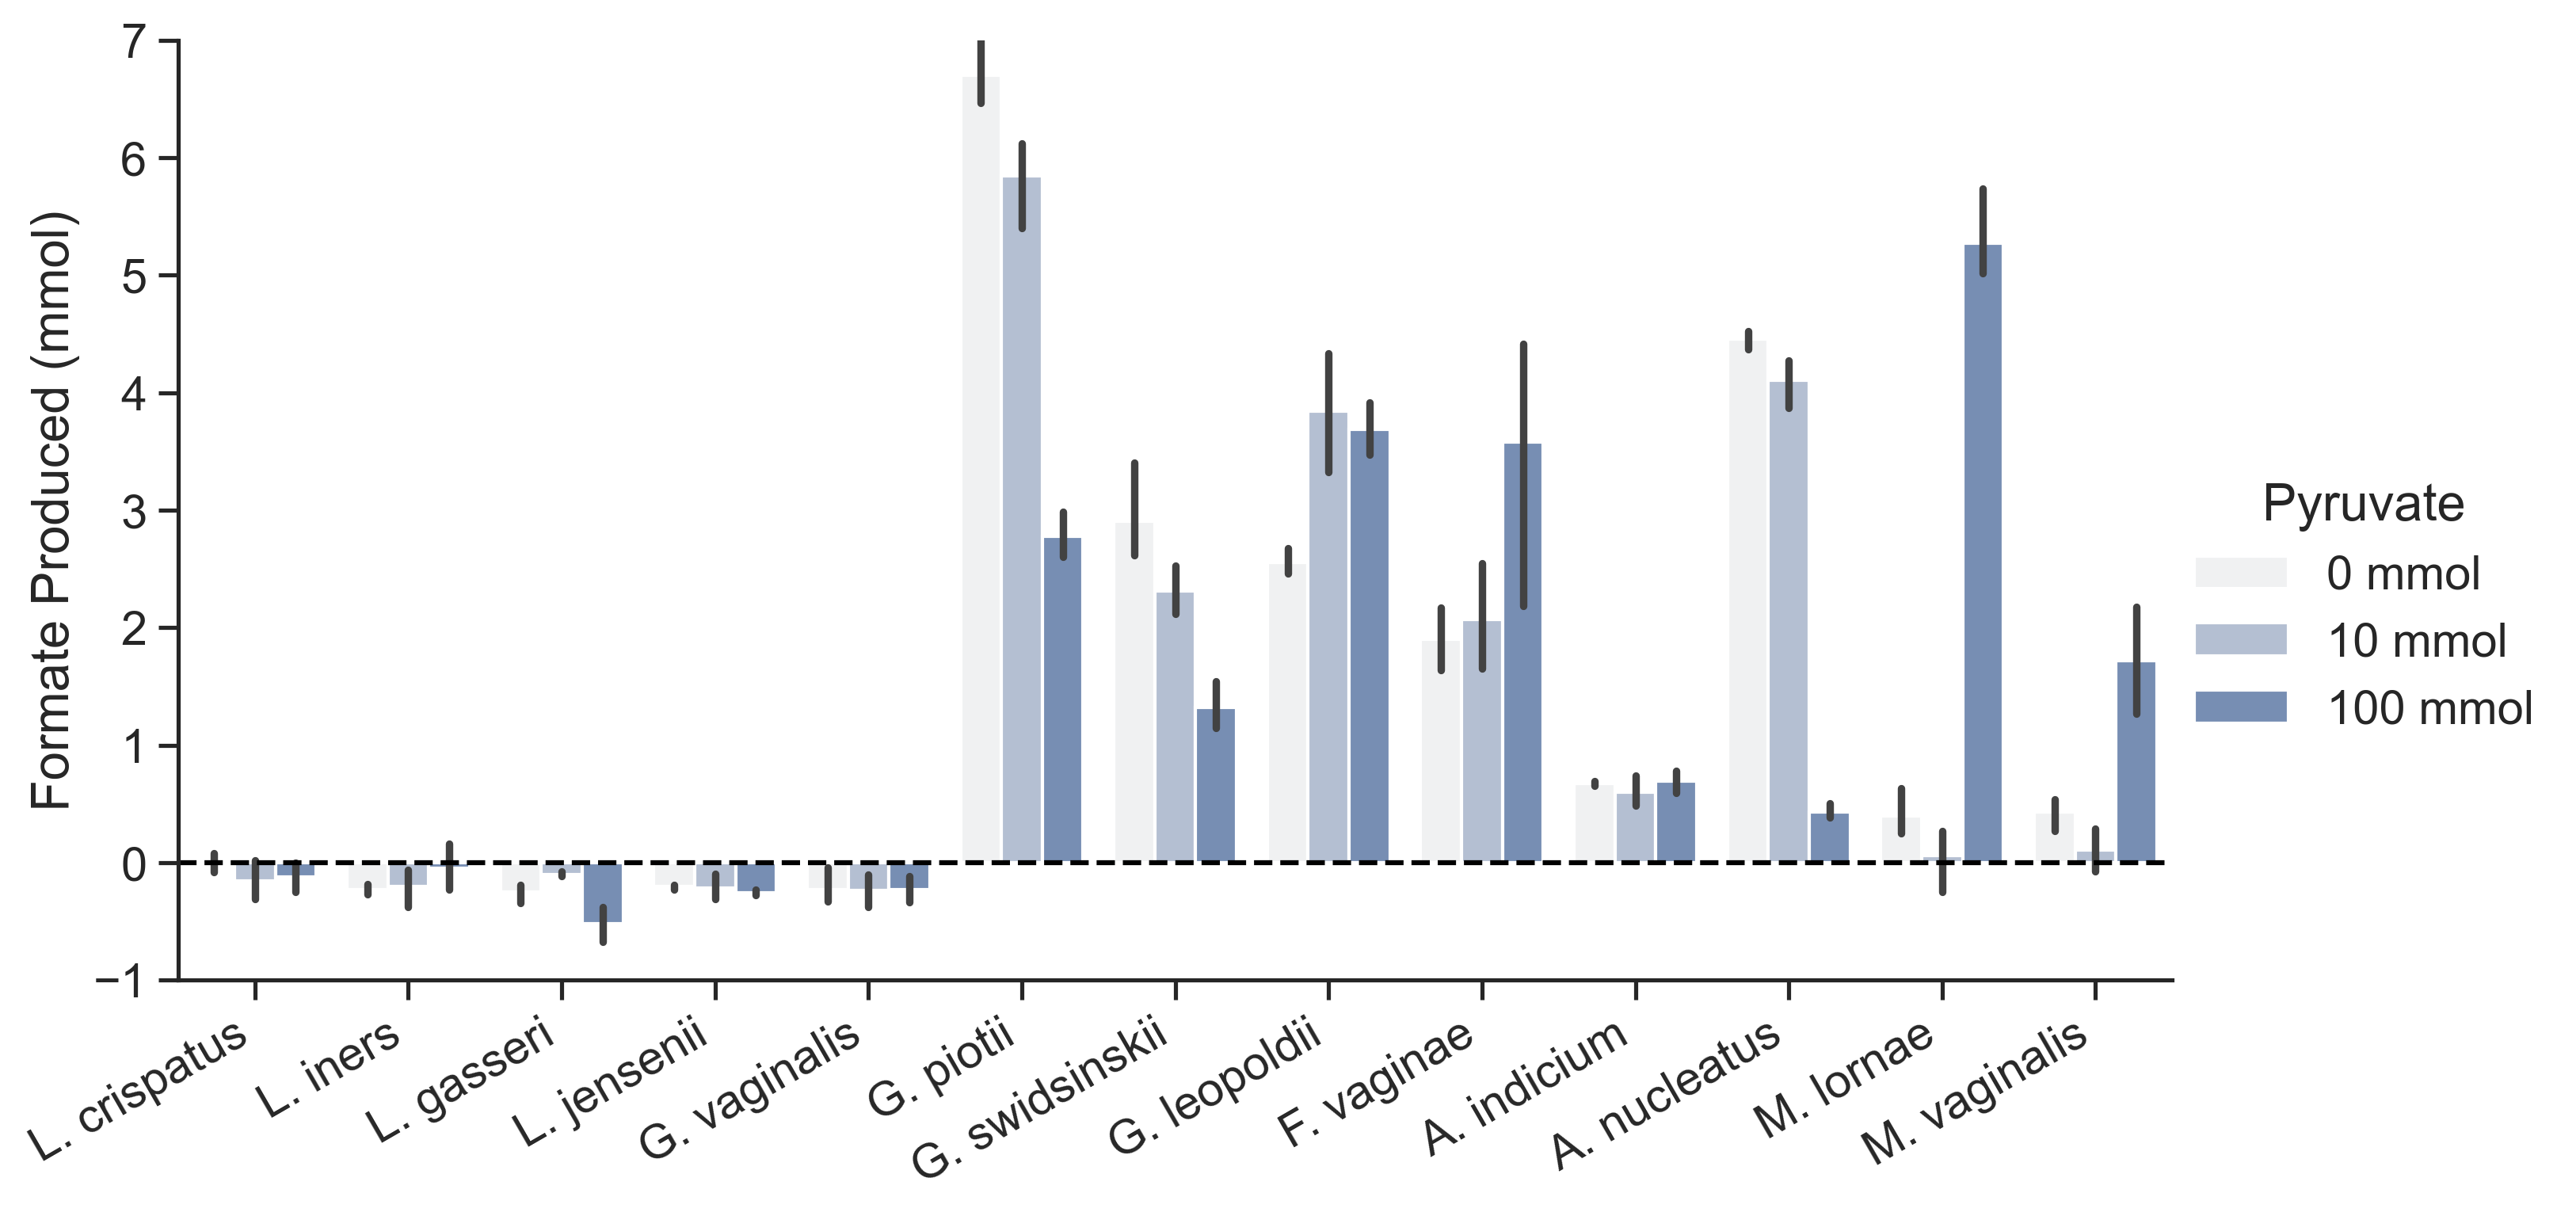

In [40]:
minusSneathiaOrder = ['L. crispatus', 'L. iners', 'L. gasseri', 'L. jensenii', 'G. vaginalis', 'G. piotii', 'G. swidsinskii', 'G. leopoldii', 'F. vaginae', 'A. indicium', 'A. nucleatus', 'M. lornae', 'M. vaginalis']
plotAg11824 = sns.catplot(data=aggregateData11824, kind='bar', x='Species', y='Formate Produced (mmol)', hue='Pyruvate', aspect=1.9, palette=myPalette, order=minusSneathiaOrder)
plotAg11824.set(ylim=(-1, 7), xlabel='')
plotAg11824.set_xticklabels(rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
plotAg11824.savefig(figPath.joinpath('1-18-24_aggregate_partial.png'), bbox_inches='tight', dpi=300)

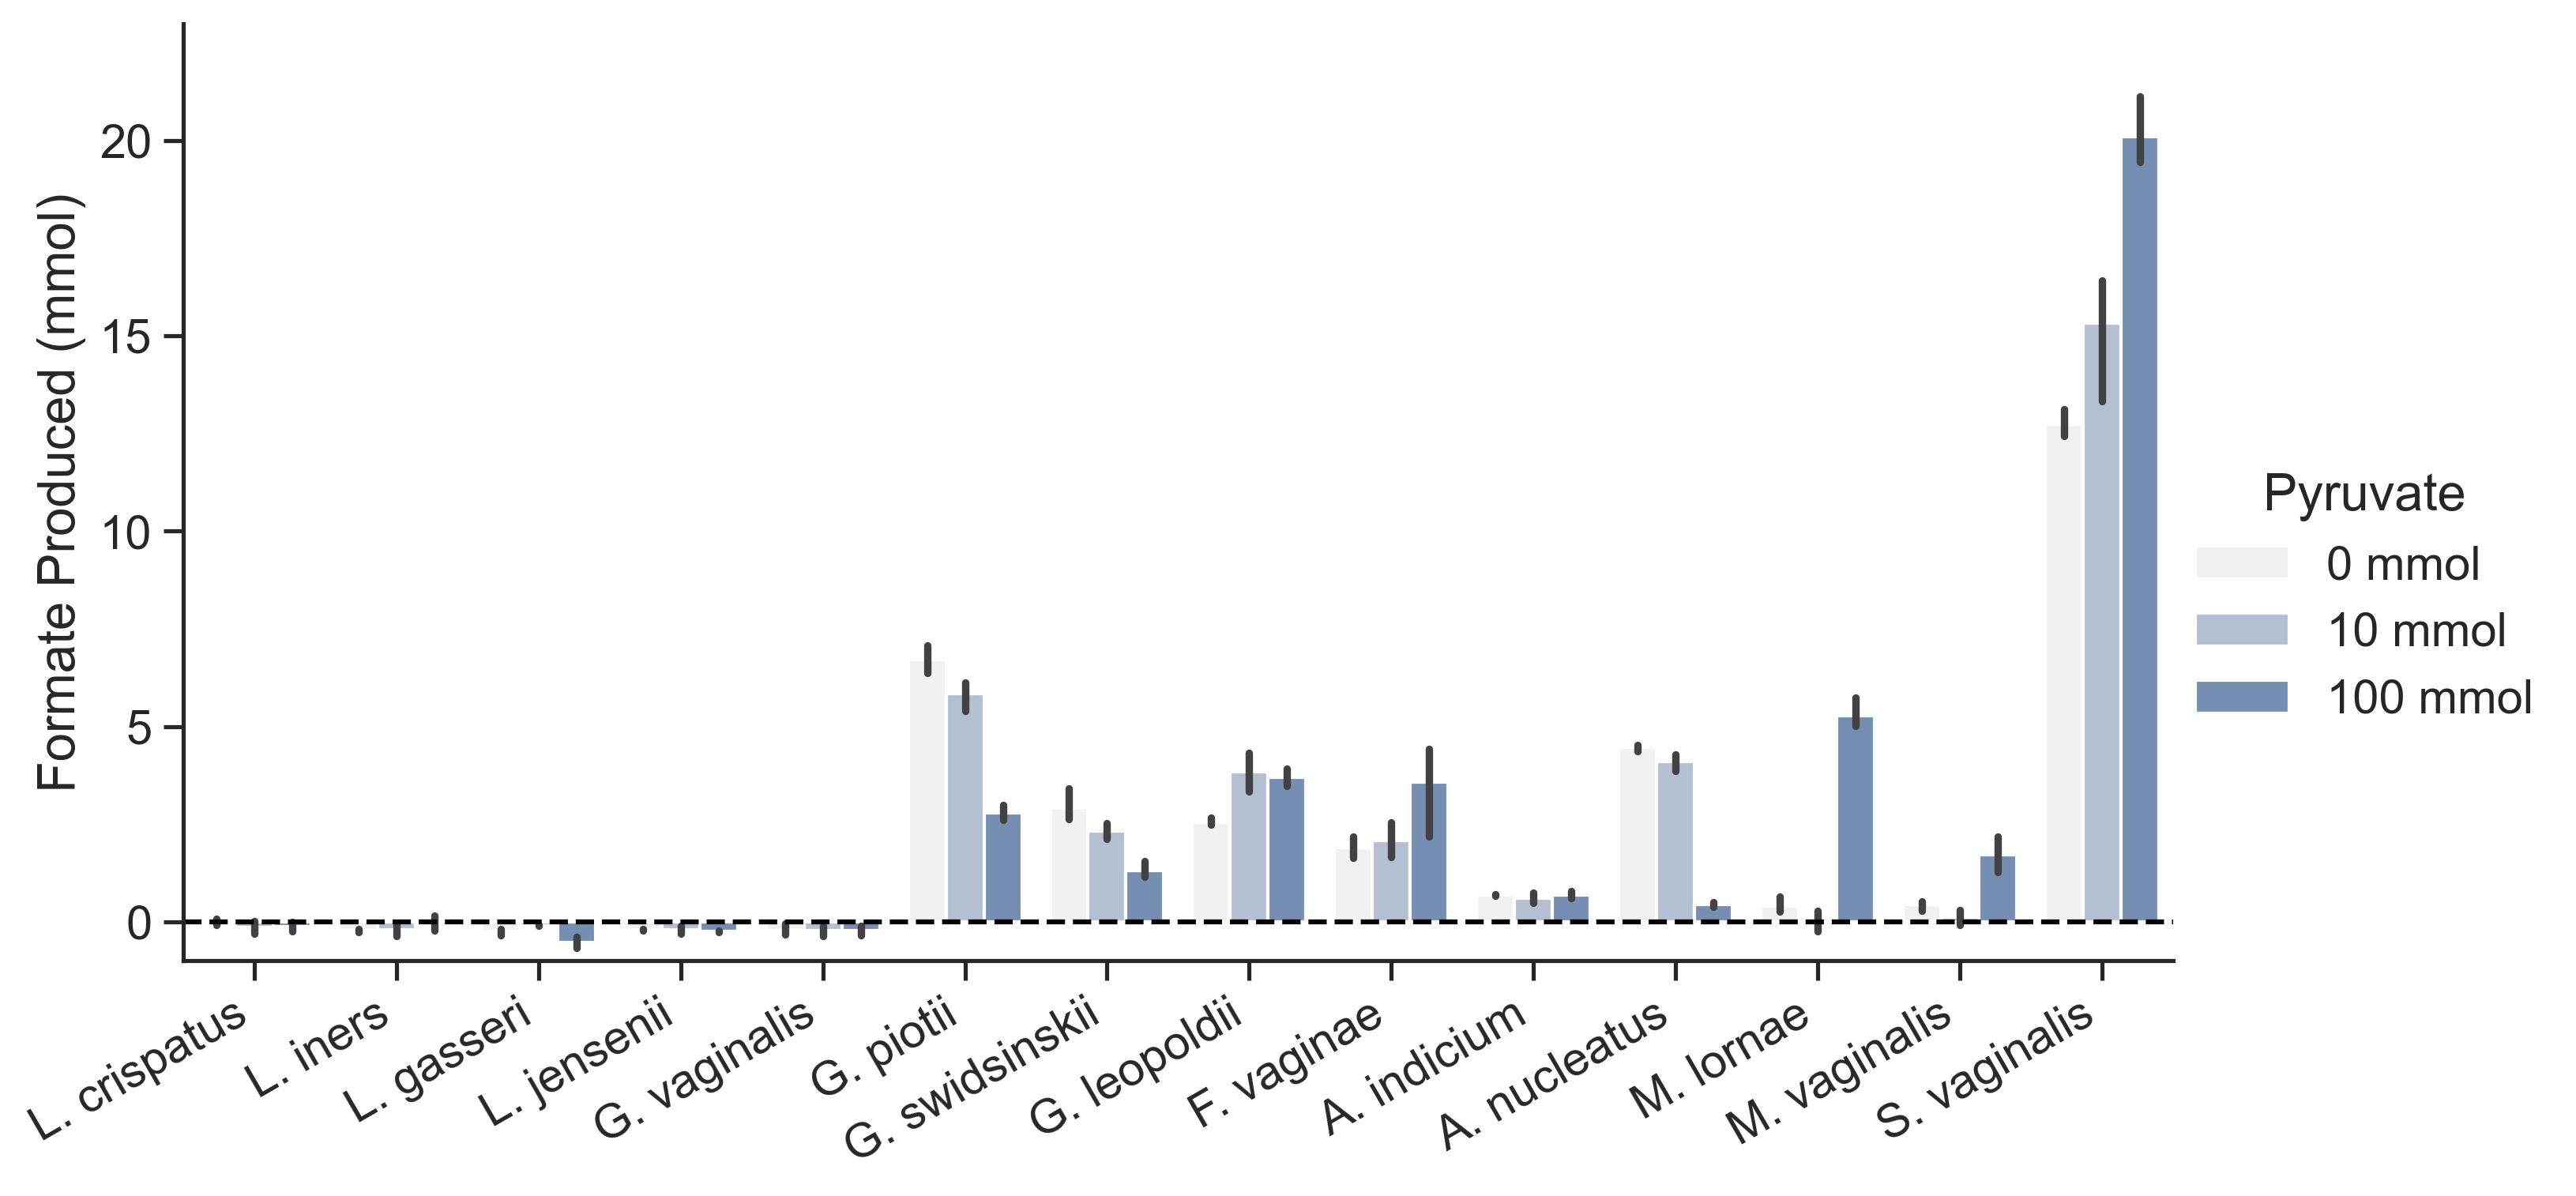

In [41]:
plotAg11824 = sns.catplot(data=aggregateData11824, kind='bar', x='Species', y='Formate Produced (mmol)', hue='Pyruvate', aspect=1.9, palette=myPalette)
plotAg11824.set(ylim=(-1, 23), xlabel='')
plotAg11824.set_xticklabels(rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
plotAg11824.savefig(figPath.joinpath('1-18-24_aggregate.png'), bbox_inches='tight', dpi=300)

In [75]:
data2724 = pd.read_csv(analysisPath.joinpath('2-7-24_mobiluncus.csv'))

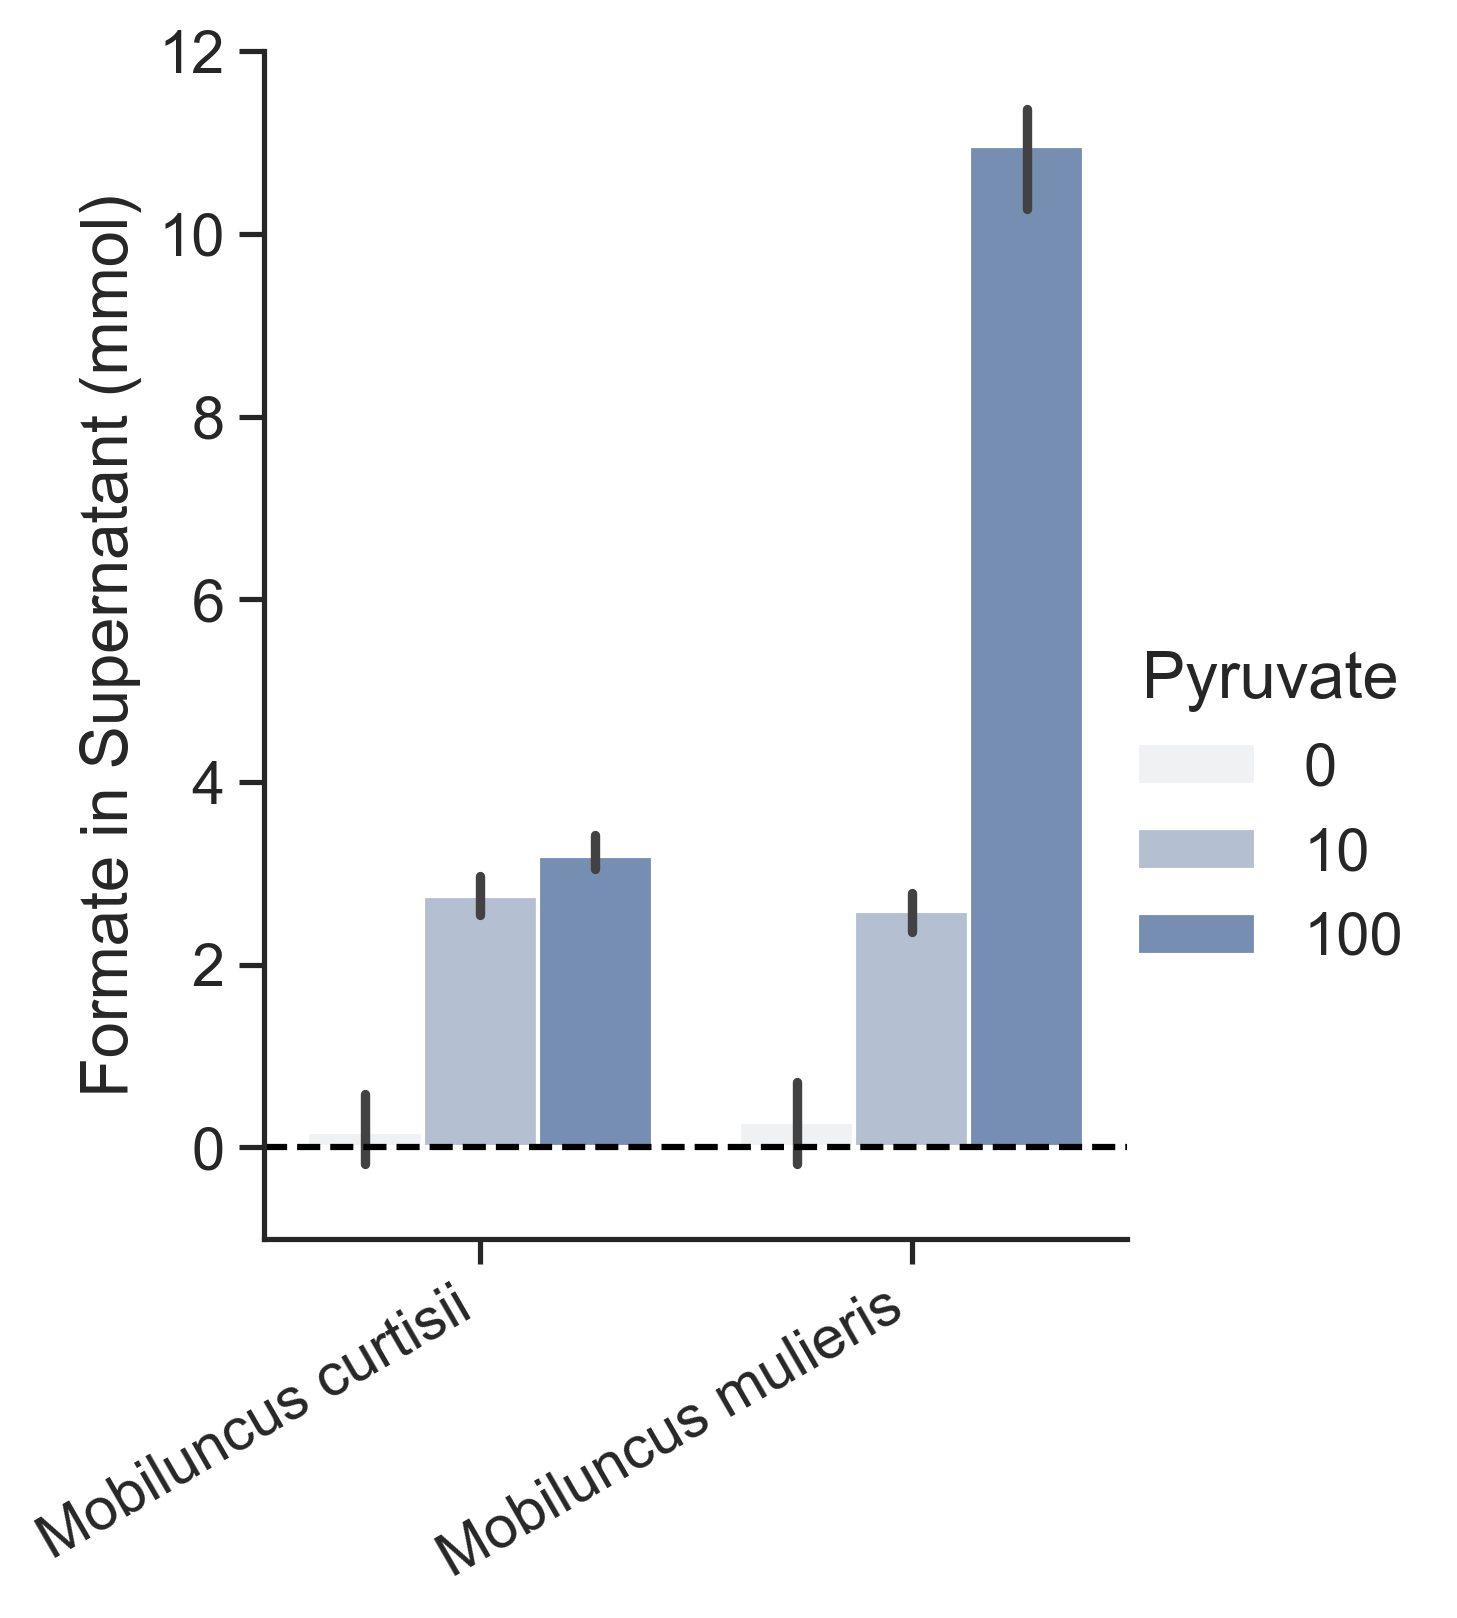

In [88]:
plot = sns.catplot(data=data2724, kind='bar', x='Species', y='Formate (mmol)', hue='Pyruvate', aspect=0.8, palette=myPalette)
plot.set(ylim=(-1, 12), xlabel='', ylabel='Formate in Supernatant (mmol)')
plot.set_xticklabels(rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
plot.savefig(figPath.joinpath('2-7-24_mobiluncus.png'), bbox_inches='tight', dpi=300)

In [4]:
aggregateProduction = pd.read_csv(analysisPath.joinpath('aggregate_formate_production.csv'))

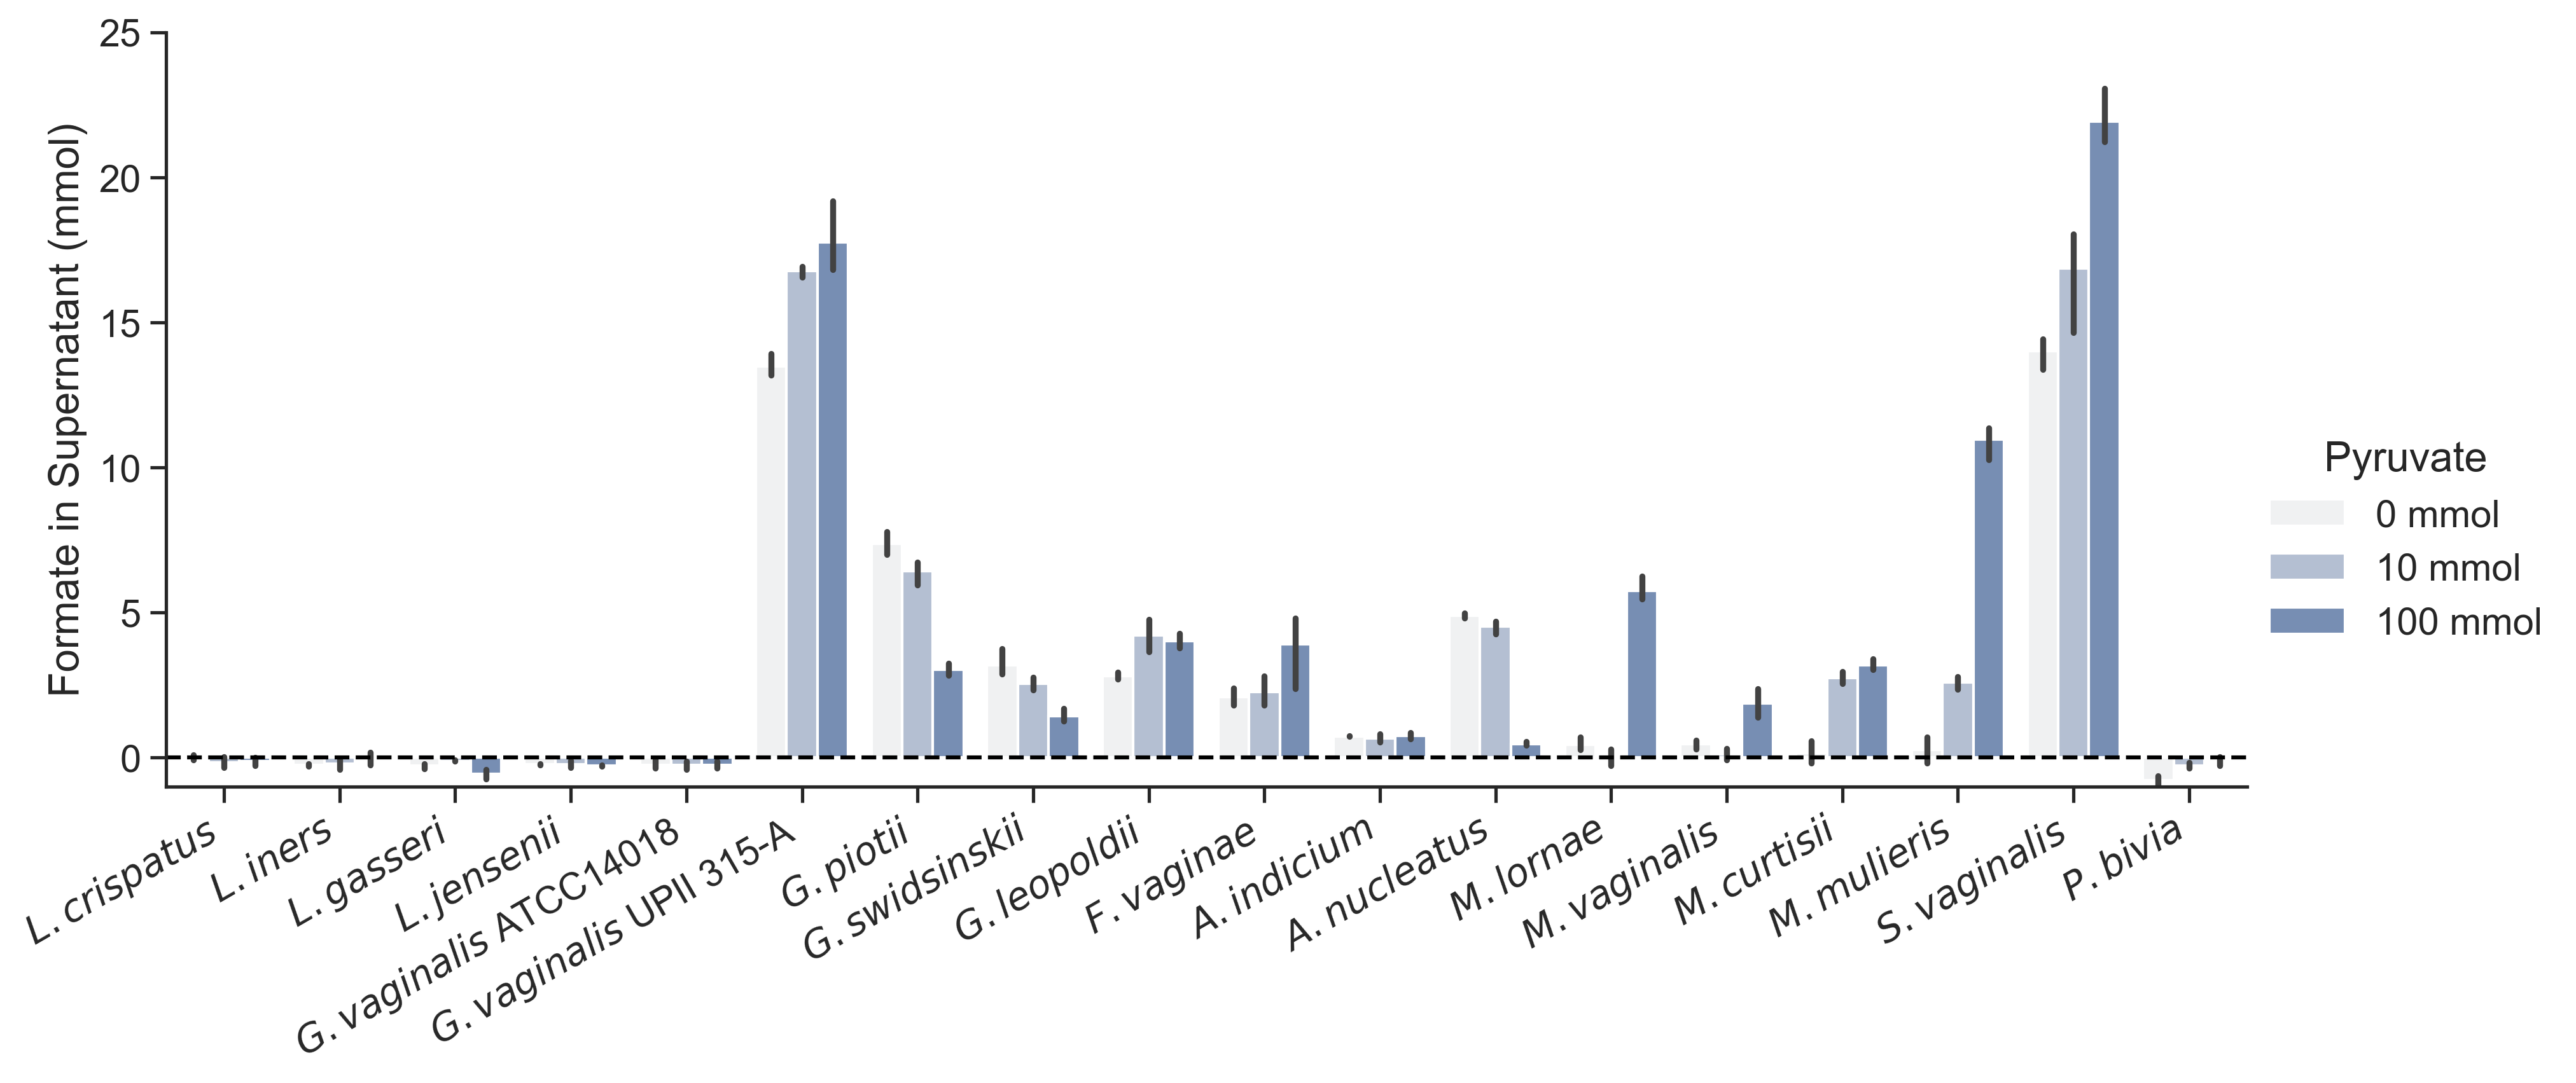

In [5]:
plotAg = sns.catplot(data=aggregateProduction, kind='bar', x='Species', y='Formate (mmol)', hue='Pyruvate', aspect=2.4, palette=myPalette)
plotAg.set(ylim=(-1, 25), xlabel='', ylabel='Formate in Supernatant (mmol)')
plotAg.set_xticklabels(['$\it{L. crispatus}$', '$\it{L. iners}$', '$\it{L. gasseri}$', '$\it{L. jensenii}$', '$\it{G. vaginalis}$ ATCC14018', '$\it{G. vaginalis}$ UPII 315-A', '$\it{G. piotii}$', '$\it{G. swidsinskii}$', '$\it{G. leopoldii}$', '$\it{F. vaginae}$', '$\it{A. indicium}$', '$\it{A. nucleatus}$', '$\it{M. lornae}$', '$\it{M. vaginalis}$', '$\it{M. curtisii}$', '$\it{M. mulieris}$', '$\it{S. vaginalis}$', '$\it{P. bivia}$'], rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
plotAg.savefig(figPath.joinpath('2-7-24_aggregate.png'), bbox_inches='tight', dpi=300)

In [6]:
# Run Mann-Whitney U tests for each species to compare the 10 and 100 mmol treatments to the 0 mmol controls.
from scipy import stats

In [9]:
statsData = {} #key=species, value=[[0mmol vals], [10mmol vals], [100mmol vals]]
for index, row in aggregateProduction.iterrows():
    if not row['Species'] in statsData.keys():
        statsData[row['Species']] = [[], [], []]
    if row['Pyruvate'] == '0 mmol':
        statsData[row['Species']][0].append(float(row['Formate (mmol)']))
    elif row['Pyruvate'] == '10 mmol':
        statsData[row['Species']][1].append(float(row['Formate (mmol)']))
    elif row['Pyruvate'] == '100 mmol':
        statsData[row['Species']][2].append(float(row['Formate (mmol)']))

In [15]:
for strain, dataList in statsData.items():
    for i in range(1, len(dataList)):
        res = stats.ttest_ind(dataList[0], dataList[i], equal_var=False)
        comparator = '10 mmol' if i == 1 else '100 mmol'
        print(f'{strain} 0 mmol vs {comparator}: {res}')

L. crispatus 0 mmol vs 10 mmol: TtestResult(statistic=1.3529693695314153, pvalue=0.27073253291825544, df=2.938956727696233)
L. crispatus 0 mmol vs 100 mmol: TtestResult(statistic=1.311973161871332, pvalue=0.2689036800568149, df=3.502284929649538)
L. iners 0 mmol vs 10 mmol: TtestResult(statistic=-0.2709244038273646, pvalue=0.8091494054452166, df=2.268149865148892)
L. iners 0 mmol vs 100 mmol: TtestResult(statistic=-1.602193612675787, pvalue=0.23987219864701137, df=2.183780870608039)
L. gasseri 0 mmol vs 10 mmol: TtestResult(statistic=-2.9244739394317816, pvalue=0.08524038440372925, df=2.284376558871183)
L. gasseri 0 mmol vs 100 mmol: TtestResult(statistic=2.7328691625115478, pvalue=0.0674825037965434, df=3.1717629811922996)
L. jensenii 0 mmol vs 10 mmol: TtestResult(statistic=0.1308542603651678, pvalue=0.907032269307272, df=2.1686561910667974)
L. jensenii 0 mmol vs 100 mmol: TtestResult(statistic=2.6432744018203596, pvalue=0.05757379314886695, df=3.9871507318000377)
G. vaginalis ATCC14

In [8]:
### Graphs for formate depletion experiments

In [9]:
data13124conc = pd.read_csv(analysisPath.joinpath('1-31-24_formate_depletion.csv'))

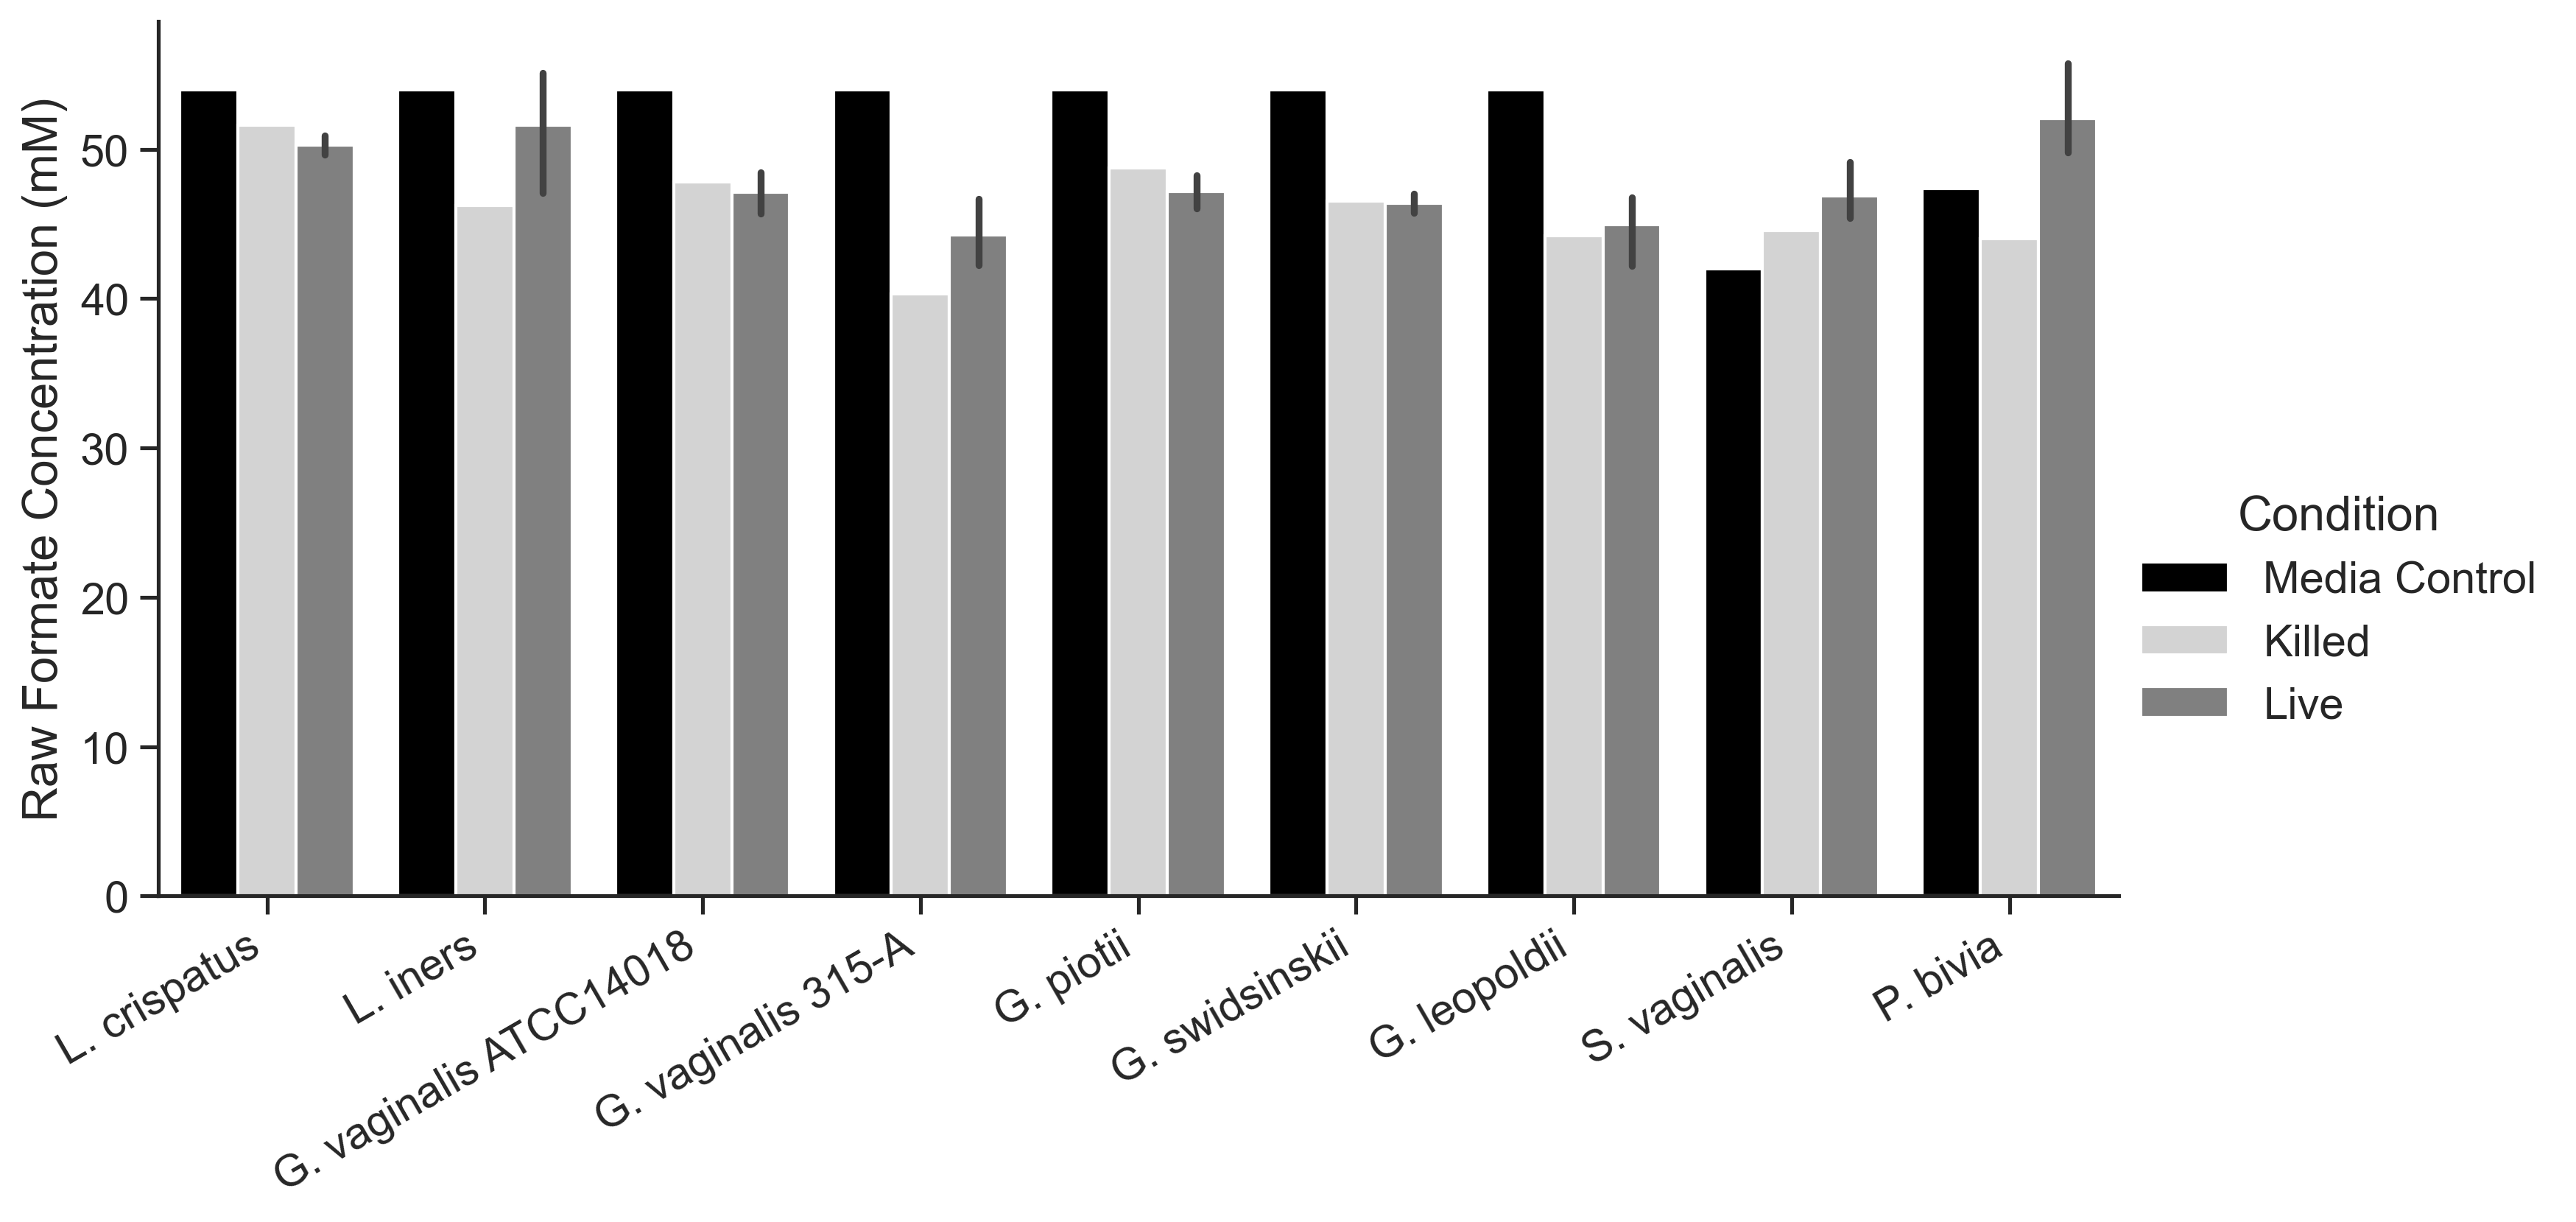

In [10]:
plotPalette = ['black', 'lightgray', 'gray']
plotDepl13124 = sns.catplot(data=data13124conc, x='Isolate', y='Measured Formate Concentration', hue='Condition', kind='bar',aspect=2, palette=plotPalette)
plotDepl13124.set(xlabel='', ylabel='Raw Formate Concentration (mM)')
plotDepl13124.set_xticklabels(rotation=30, ha='right')
plotDepl13124.savefig(figPath.joinpath('1-31-24_formate_depletion_concentrations.png'), bbox_inches='tight', dpi=300)

In [11]:
data13124media = pd.read_csv(analysisPath.joinpath('1-31-24_formate_depletion_medianorm.csv'))

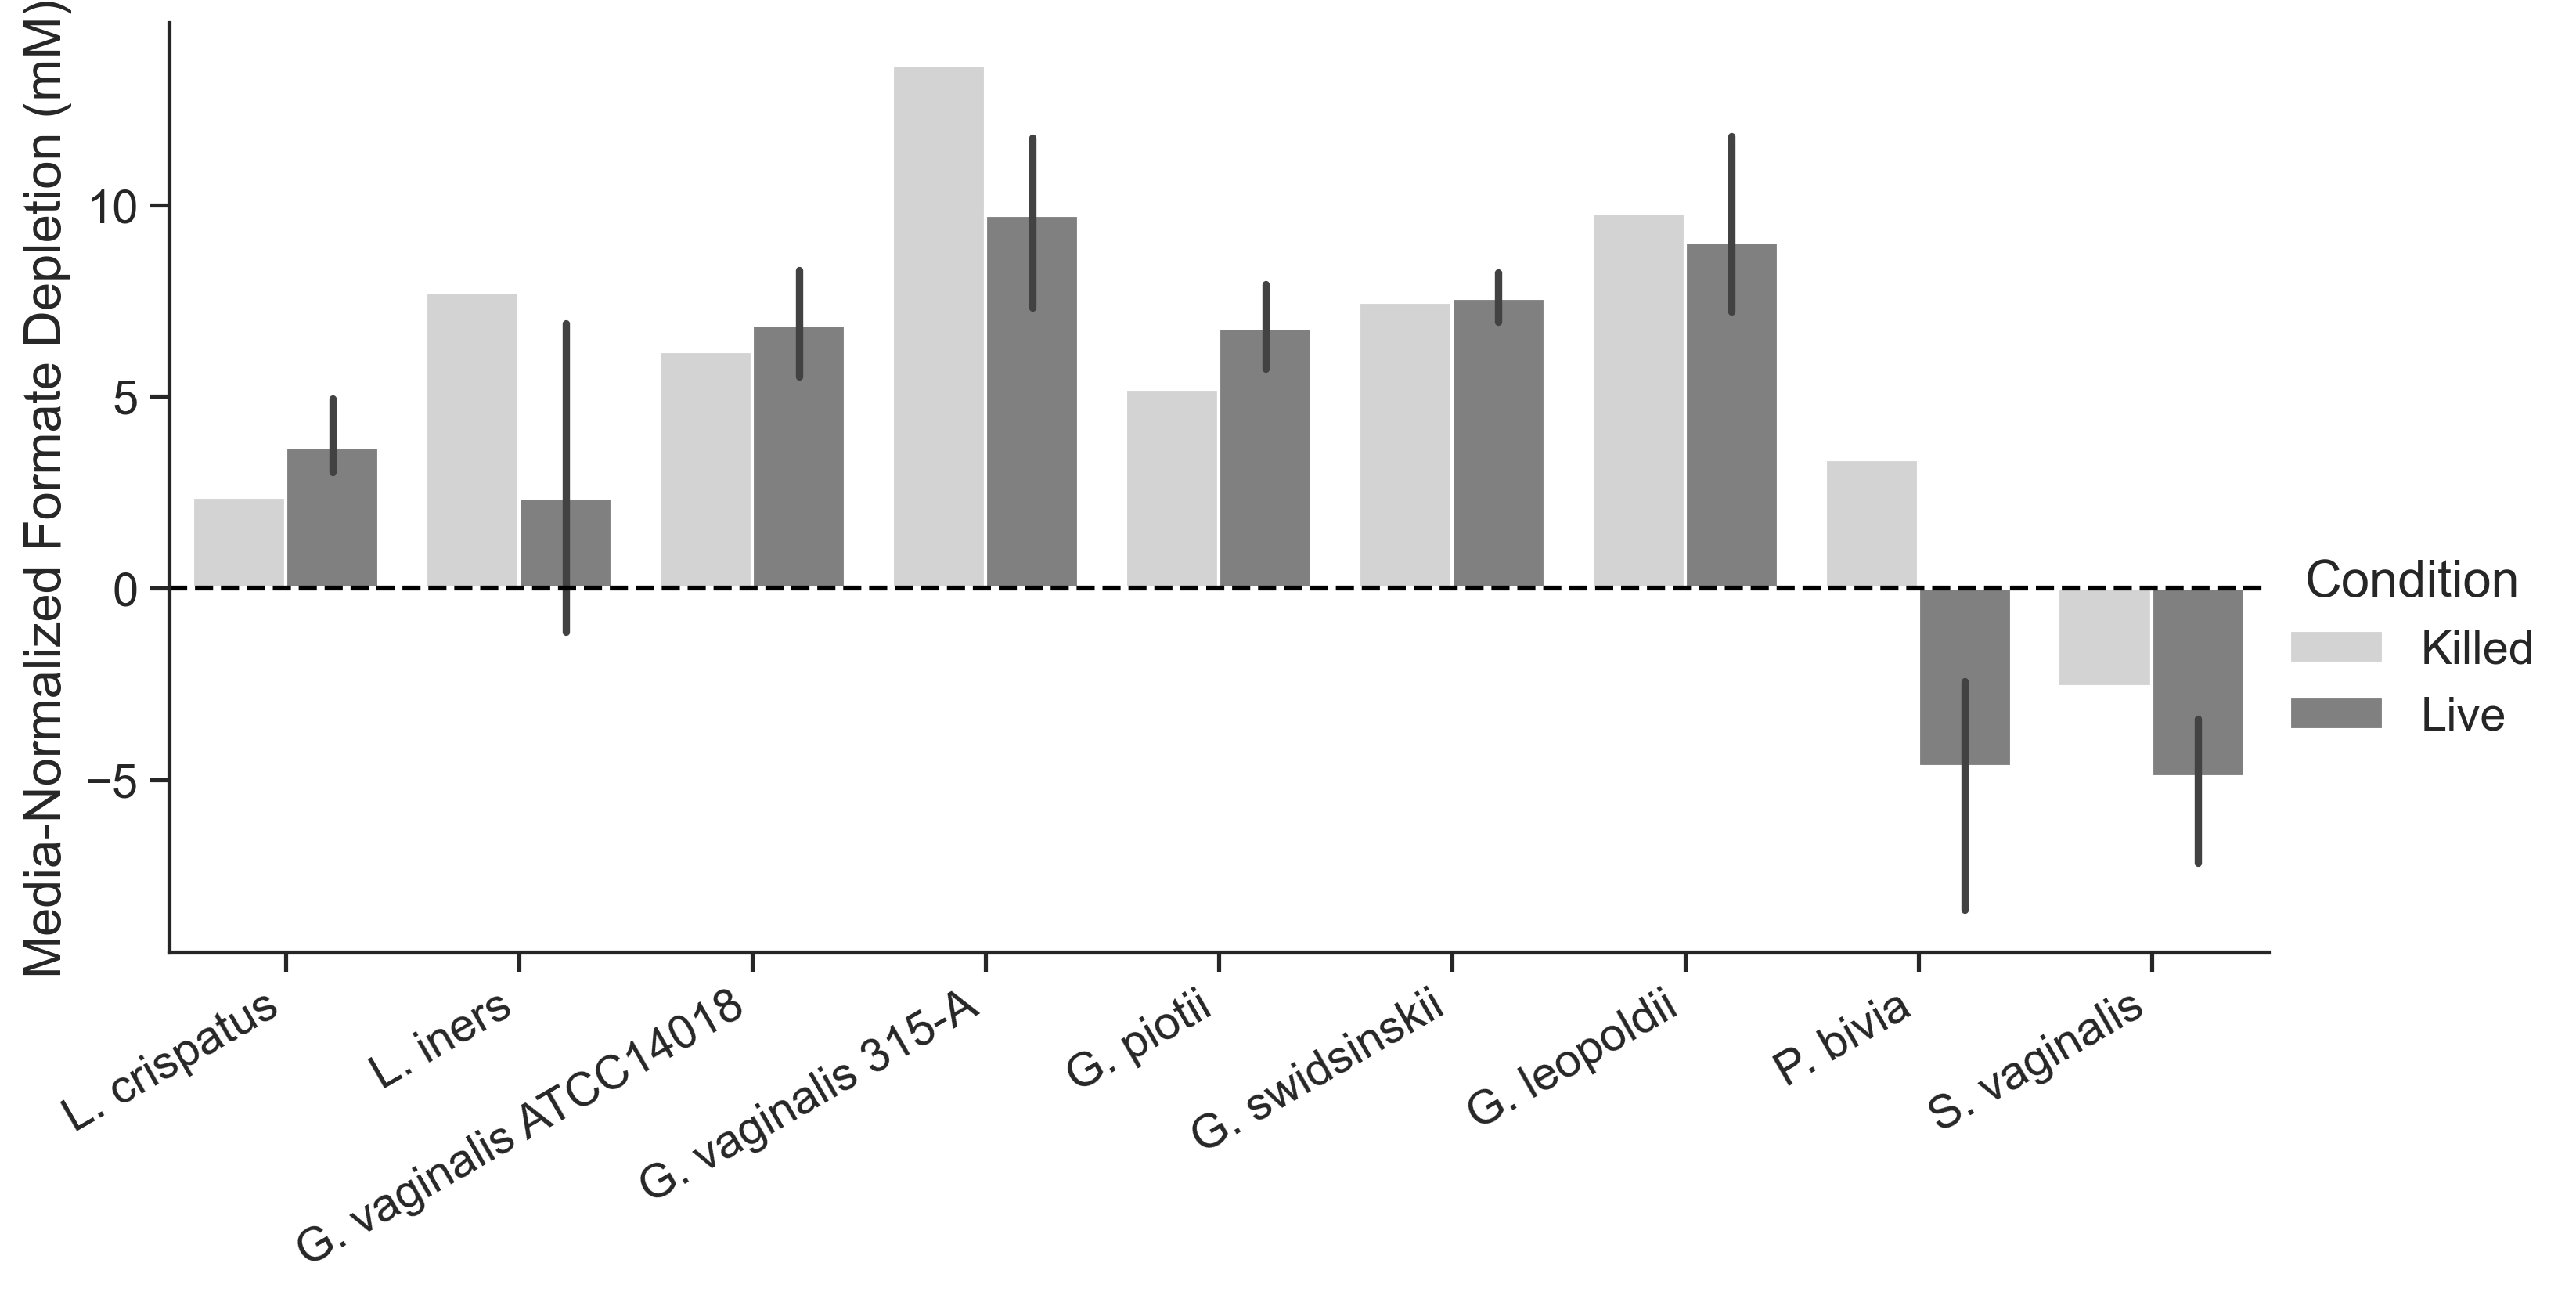

In [12]:
plotPalette = ['lightgray', 'gray']
plotDepl13124 = sns.catplot(data=data13124media, x='Isolate', y='Formate Depleted', hue='Condition', kind='bar',aspect=2, palette=plotPalette)
plotDepl13124.set(xlabel='', ylabel='Media-Normalized Formate Depletion (mM)')
plotDepl13124.set_xticklabels(rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
plotDepl13124.savefig(figPath.joinpath('1-31-24_formate_depletion_media-normalized.png'), bbox_inches='tight', dpi=300)

In [13]:
data13124killed = pd.read_csv(analysisPath.joinpath('1-31-24_formate_depletion_killednorm.csv'))

C:\Users\emlee\AppData\Local\Temp\ipykernel_14088\2595068188.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plotDepl13124.set_xticklabels(plotDepl13124.get_xticklabels(), rotation=30, ha='right')


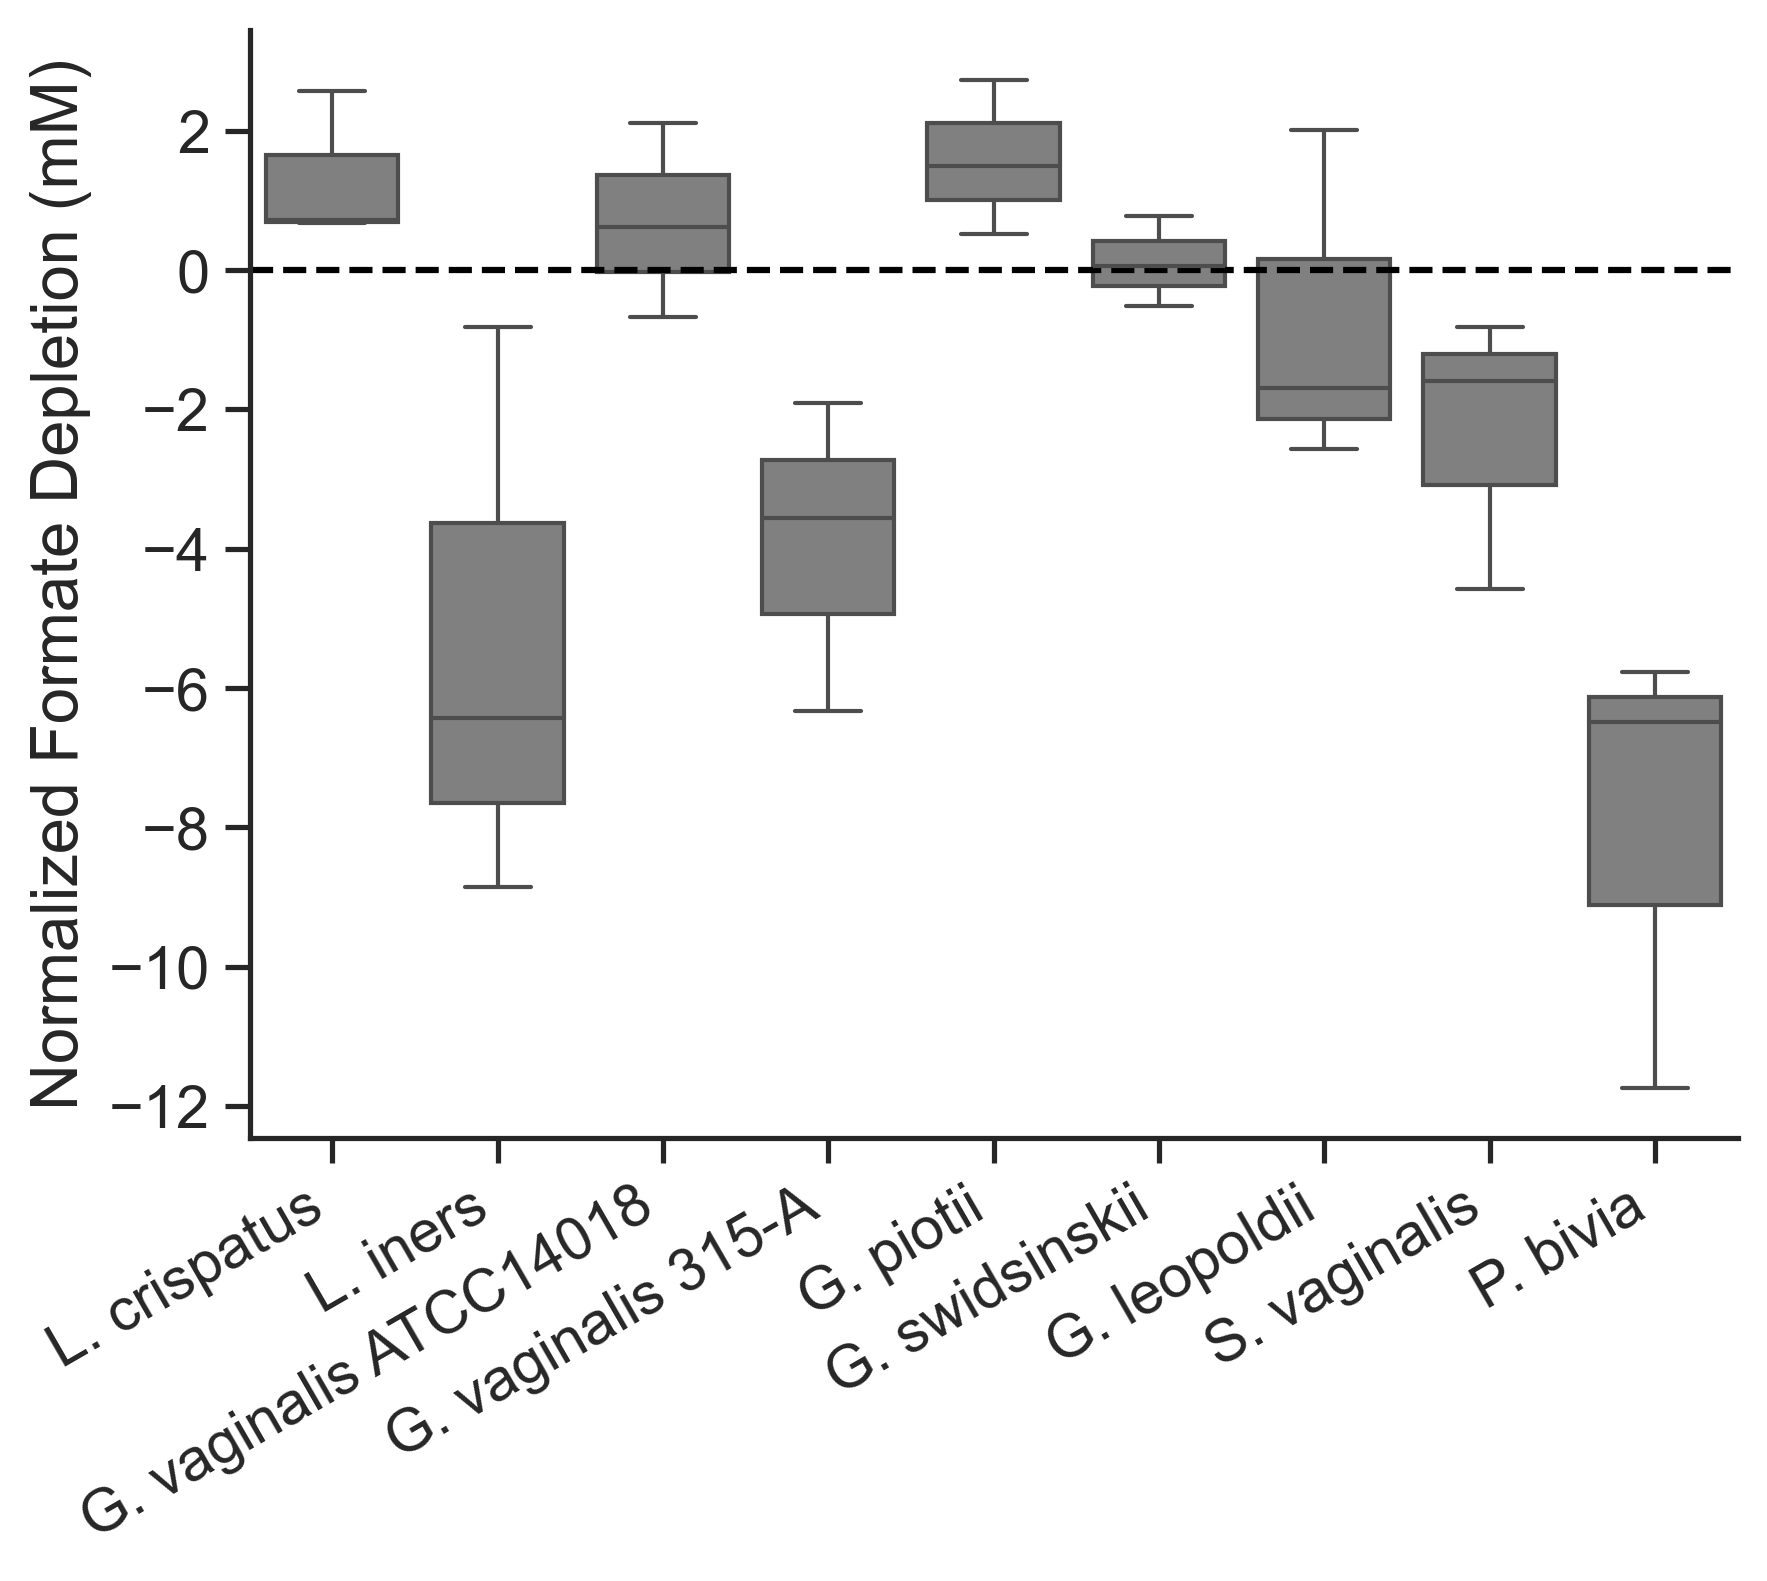

In [14]:
plotDepl13124 = sns.boxplot(data=data13124killed, x='Isolate', y='Formate Depleted', color='gray')
plotDepl13124.set(xlabel='', ylabel='Normalized Formate Depletion (mM)')
plotDepl13124.set_xticklabels(plotDepl13124.get_xticklabels(), rotation=30, ha='right')
plt.axhline(0, ls='--', color='black')
sns.despine()
saveFig(plotDepl13124, figPath.joinpath('1-31-24_formate_depletion_killed-normalized.png'))

In [15]:
data2524conc = pd.read_csv(analysisPath.joinpath('2-5-24_formate_depletion.csv'))

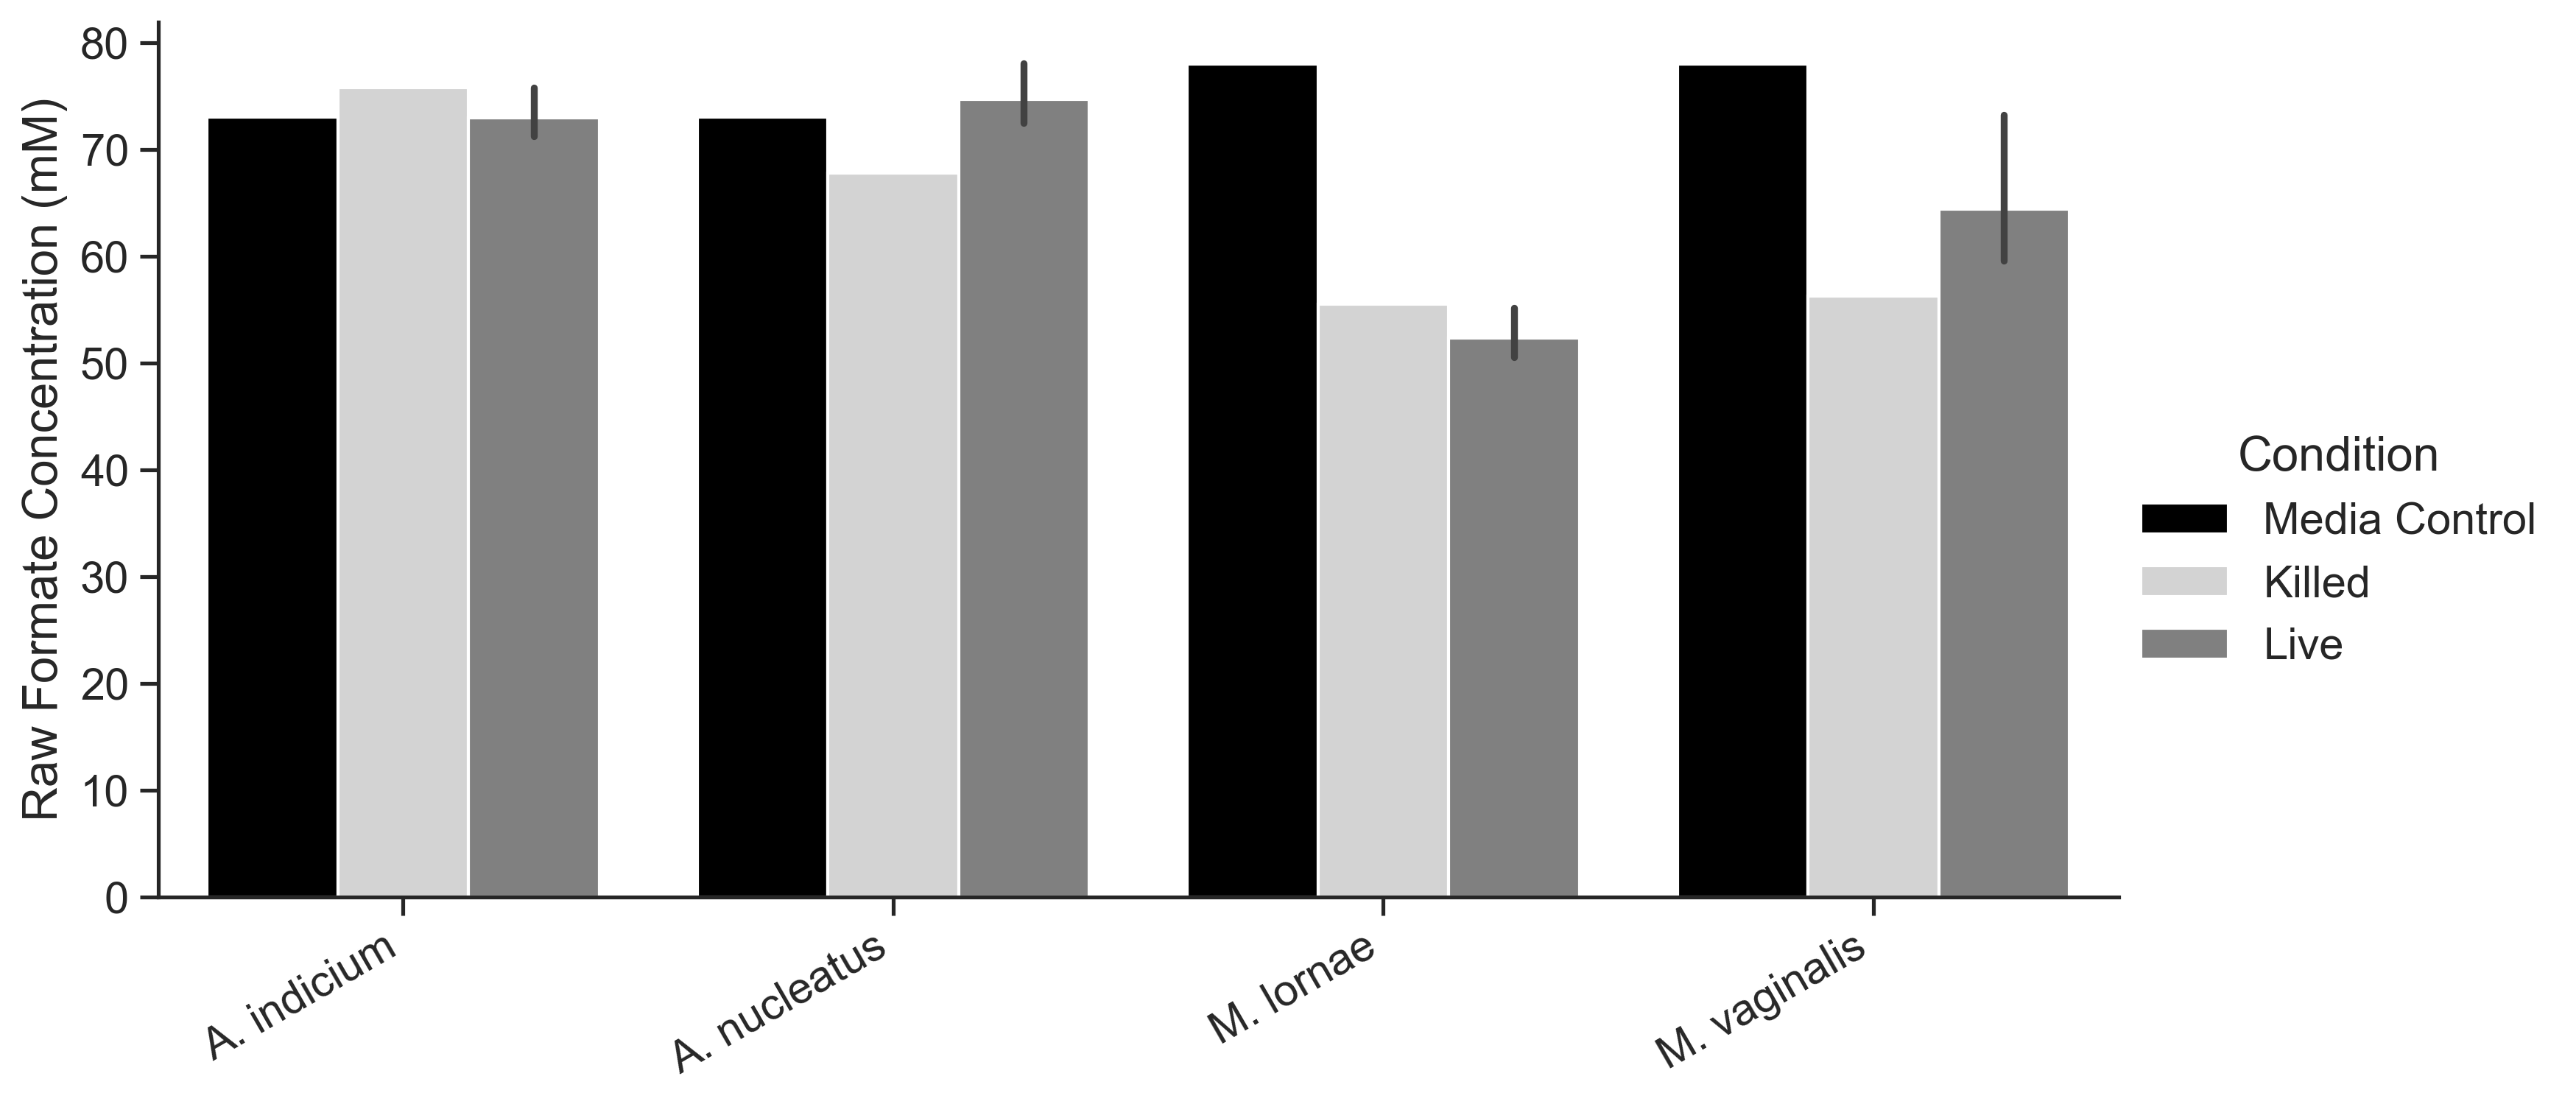

In [16]:
plotPalette = ['black', 'lightgray', 'gray']
plotDepl2524 = sns.catplot(data=data2524conc, x='Isolate', y='Measured Formate Concentration', hue='Condition', kind='bar',aspect=2, palette=plotPalette)
plotDepl2524.set(xlabel='', ylabel='Raw Formate Concentration (mM)')
plotDepl2524.set_xticklabels(rotation=30, ha='right')
plotDepl2524.savefig(figPath.joinpath('2-5-24_formate_depletion_concentrations.png'), bbox_inches='tight', dpi=300)

I think the best way to visualize the formate depletion data will be to show the amount of formate each isolate depleted, relative to its heat-inactivated control. Those controls were generally closer to the live data, and still would get the point across that the bacteria are not consuming large quantities of formate.

In [17]:
# Pull the formate concentrations for heat-inactivated and live bacteria for each isolate.

# Helper function that gathers the formate concentration for killed and live for each isolate, and adds them to dictionaries
def extractFormateData(dataframe, killedDict, liveDict):
    for index, row in dataframe.iterrows():
        if row['Condition'] == 'Killed':
            killedDict[row['Isolate']] = float(row['Measured Formate Concentration'])
        elif row['Condition'] == 'Live':
            if not row['Isolate'] in liveDict.keys():
                liveDict[row['Isolate']] = []
            liveDict[row['Isolate']].append(float(row['Measured Formate Concentration']))

In [18]:
liveDict = {}
killedDict = {}
extractFormateData(data13124conc, killedDict, liveDict)
extractFormateData(data2524conc, killedDict, liveDict)

In [19]:
ratioDict = {'Isolate':[], 'Ratio':[]}
for isolate in killedDict.keys():
    for i in range(len(liveDict[isolate])):
        ratioDict['Isolate'].append(isolate)
        ratioDict['Ratio'].append(liveDict[isolate][i] / killedDict[isolate] * 100)

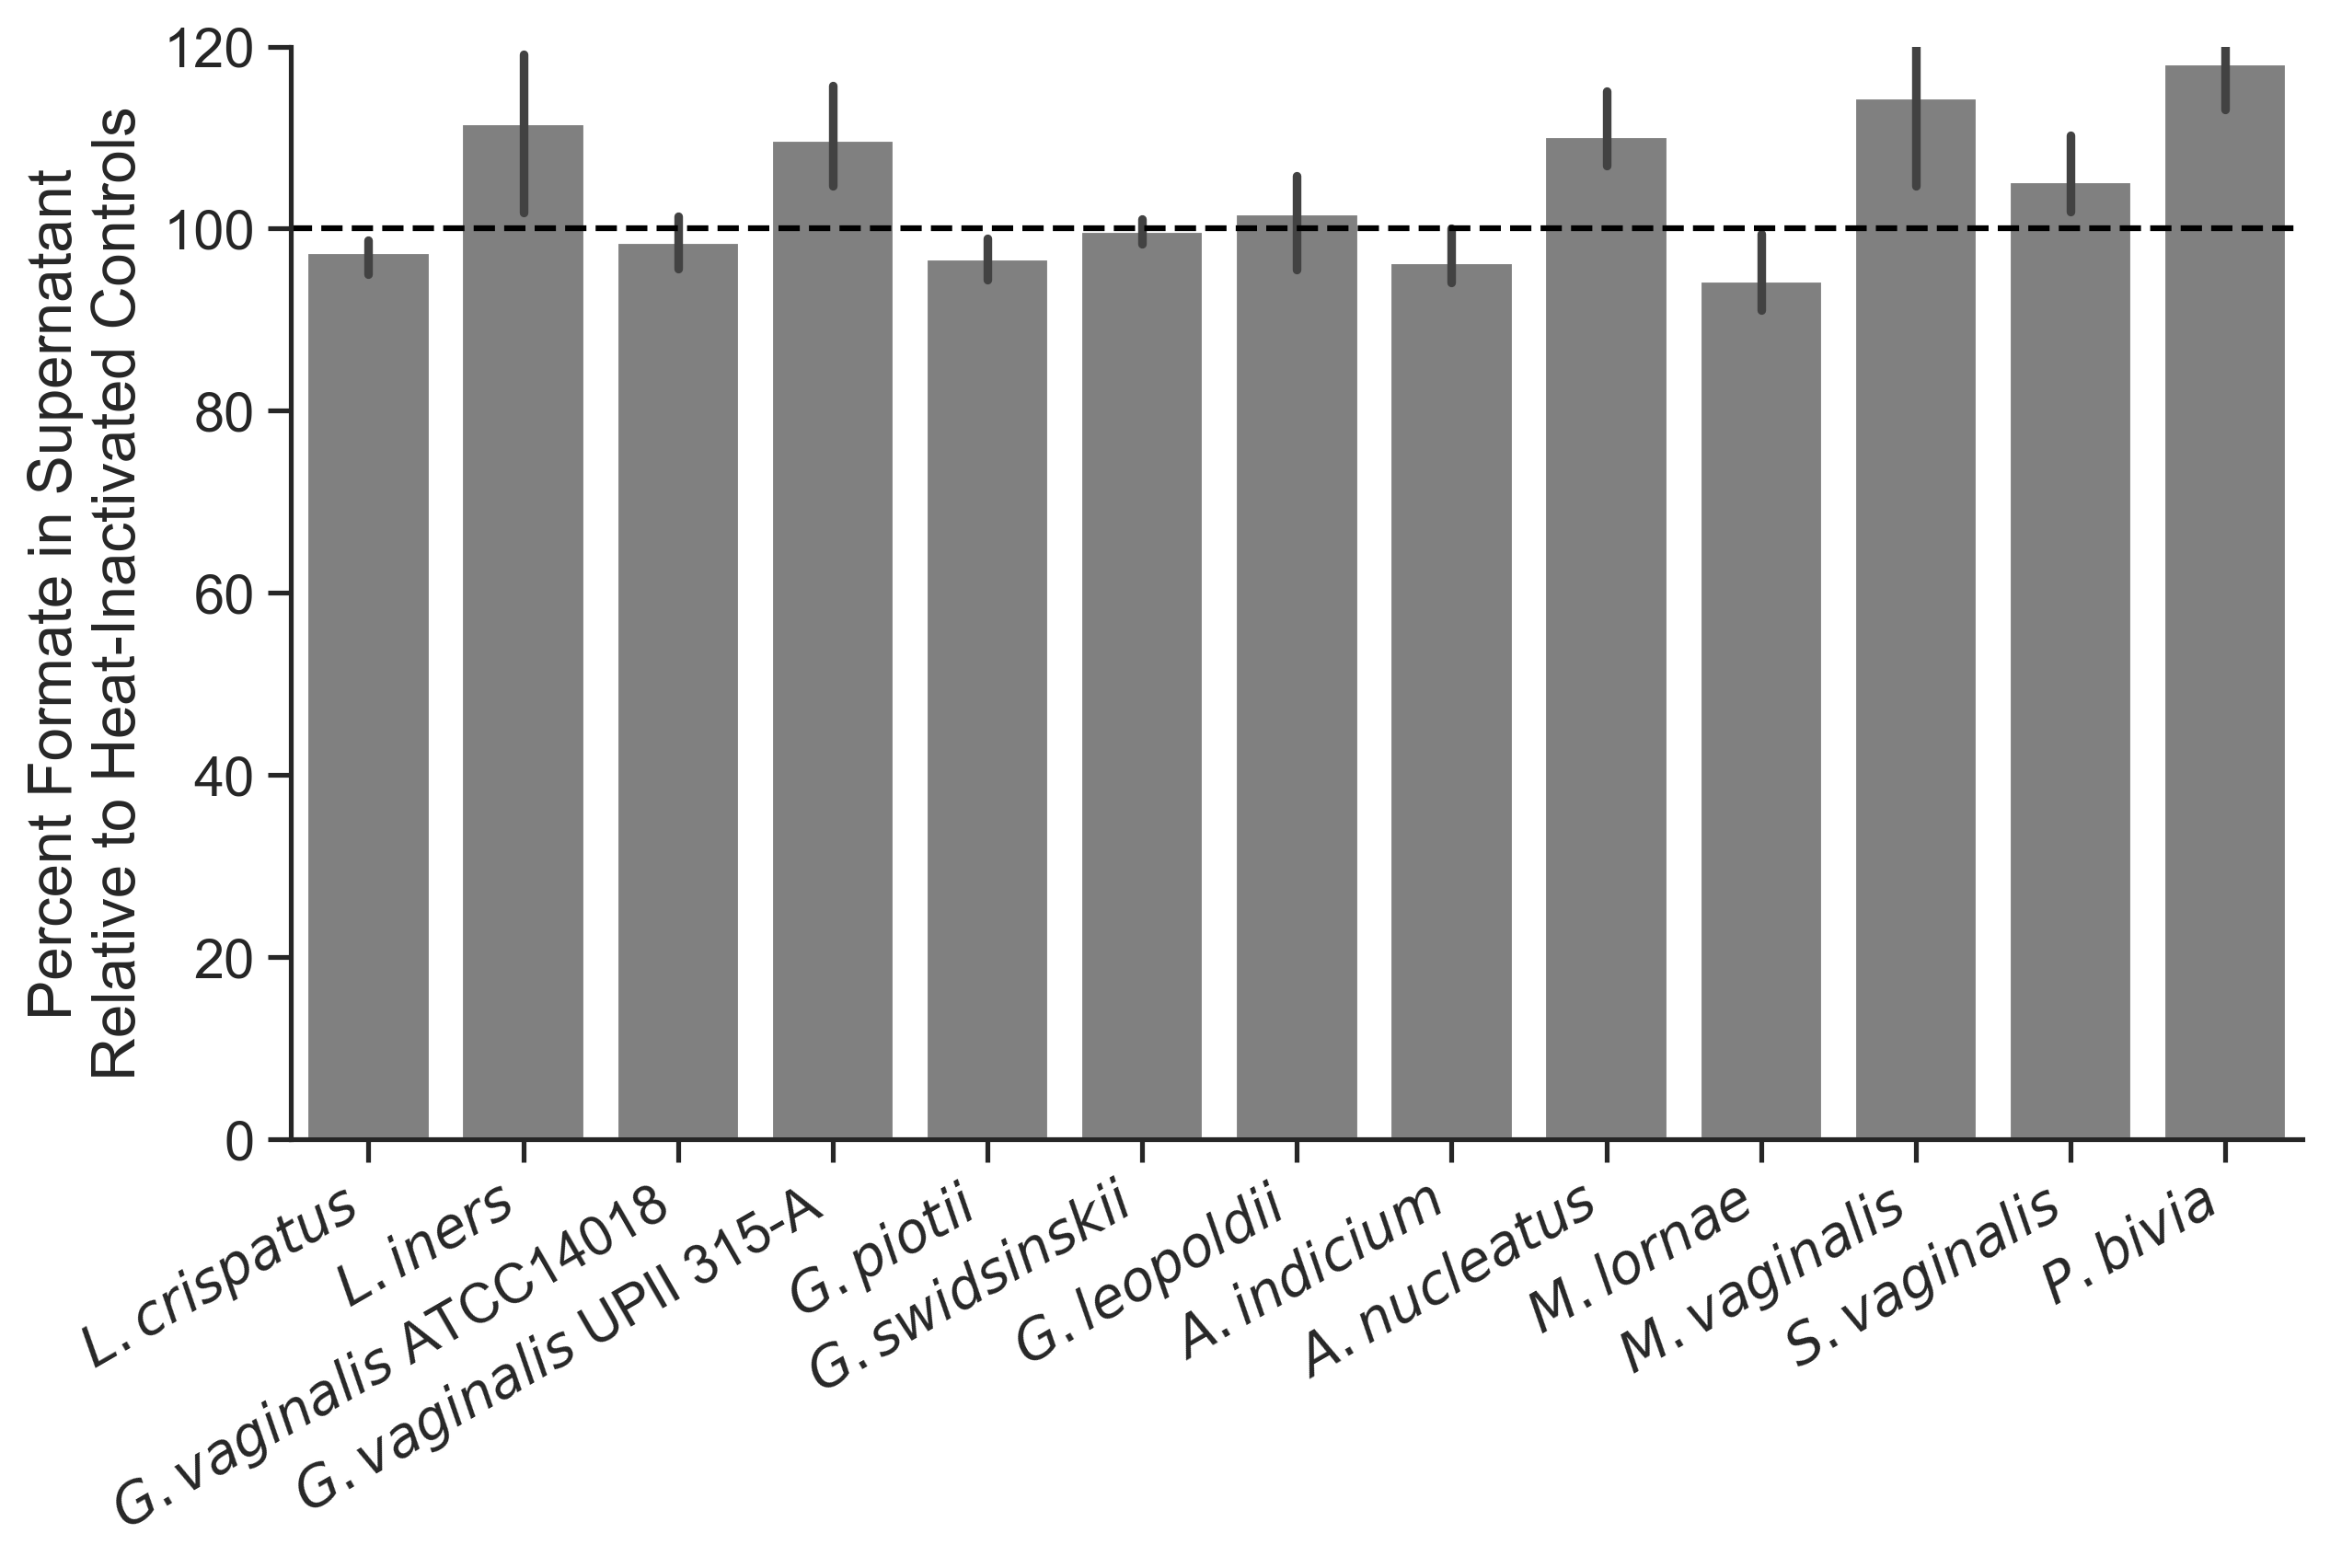

In [34]:
plotOrder = ['L. crispatus', 'L. iners', 'G. vaginalis ATCC14018', 'G. vaginalis 315-A', 'G. piotii', 'G. swidsinskii', 'G. leopoldii', 'A. indicium', 'A. nucleatus', 'M. lornae', 'M. vaginalis', 'S. vaginalis', 'P. bivia']
percentsPlot = sns.catplot(data=pd.DataFrame(ratioDict), x='Isolate', y='Ratio', kind='bar', aspect=1.7, color='gray', order=plotOrder)
percentsPlot.set(ylabel='Percent Formate in Supernatant\nRelative to Heat-Inactivated Controls', xlabel='', ylim=(0, 120))
percentsPlot.set_xticklabels(['$\it{L. crispatus}$', '$\it{L. iners}$', '$\it{G. vaginalis}$ ATCC14018', '$\it{G. vaginalis}$ UPII 315-A', '$\it{G. piotii}$', '$\it{G. swidsinskii}$', '$\it{G. leopoldii}$', '$\it{A. indicium}$', '$\it{A. nucleatus}$', '$\it{M. lornae}$', '$\it{M. vaginalis}$', '$\it{S. vaginalis}$', '$\it{P. bivia}$'], rotation=30, ha='right')
plt.axhline(100, ls='--', color='black')
percentsPlot.savefig(figPath.joinpath('formate_utilization_percents.png'), bbox_inches='tight', dpi=300)

In [106]:
data2924depl = pd.read_csv(analysisPath.joinpath('2-9-24_formate_depletion.csv'))

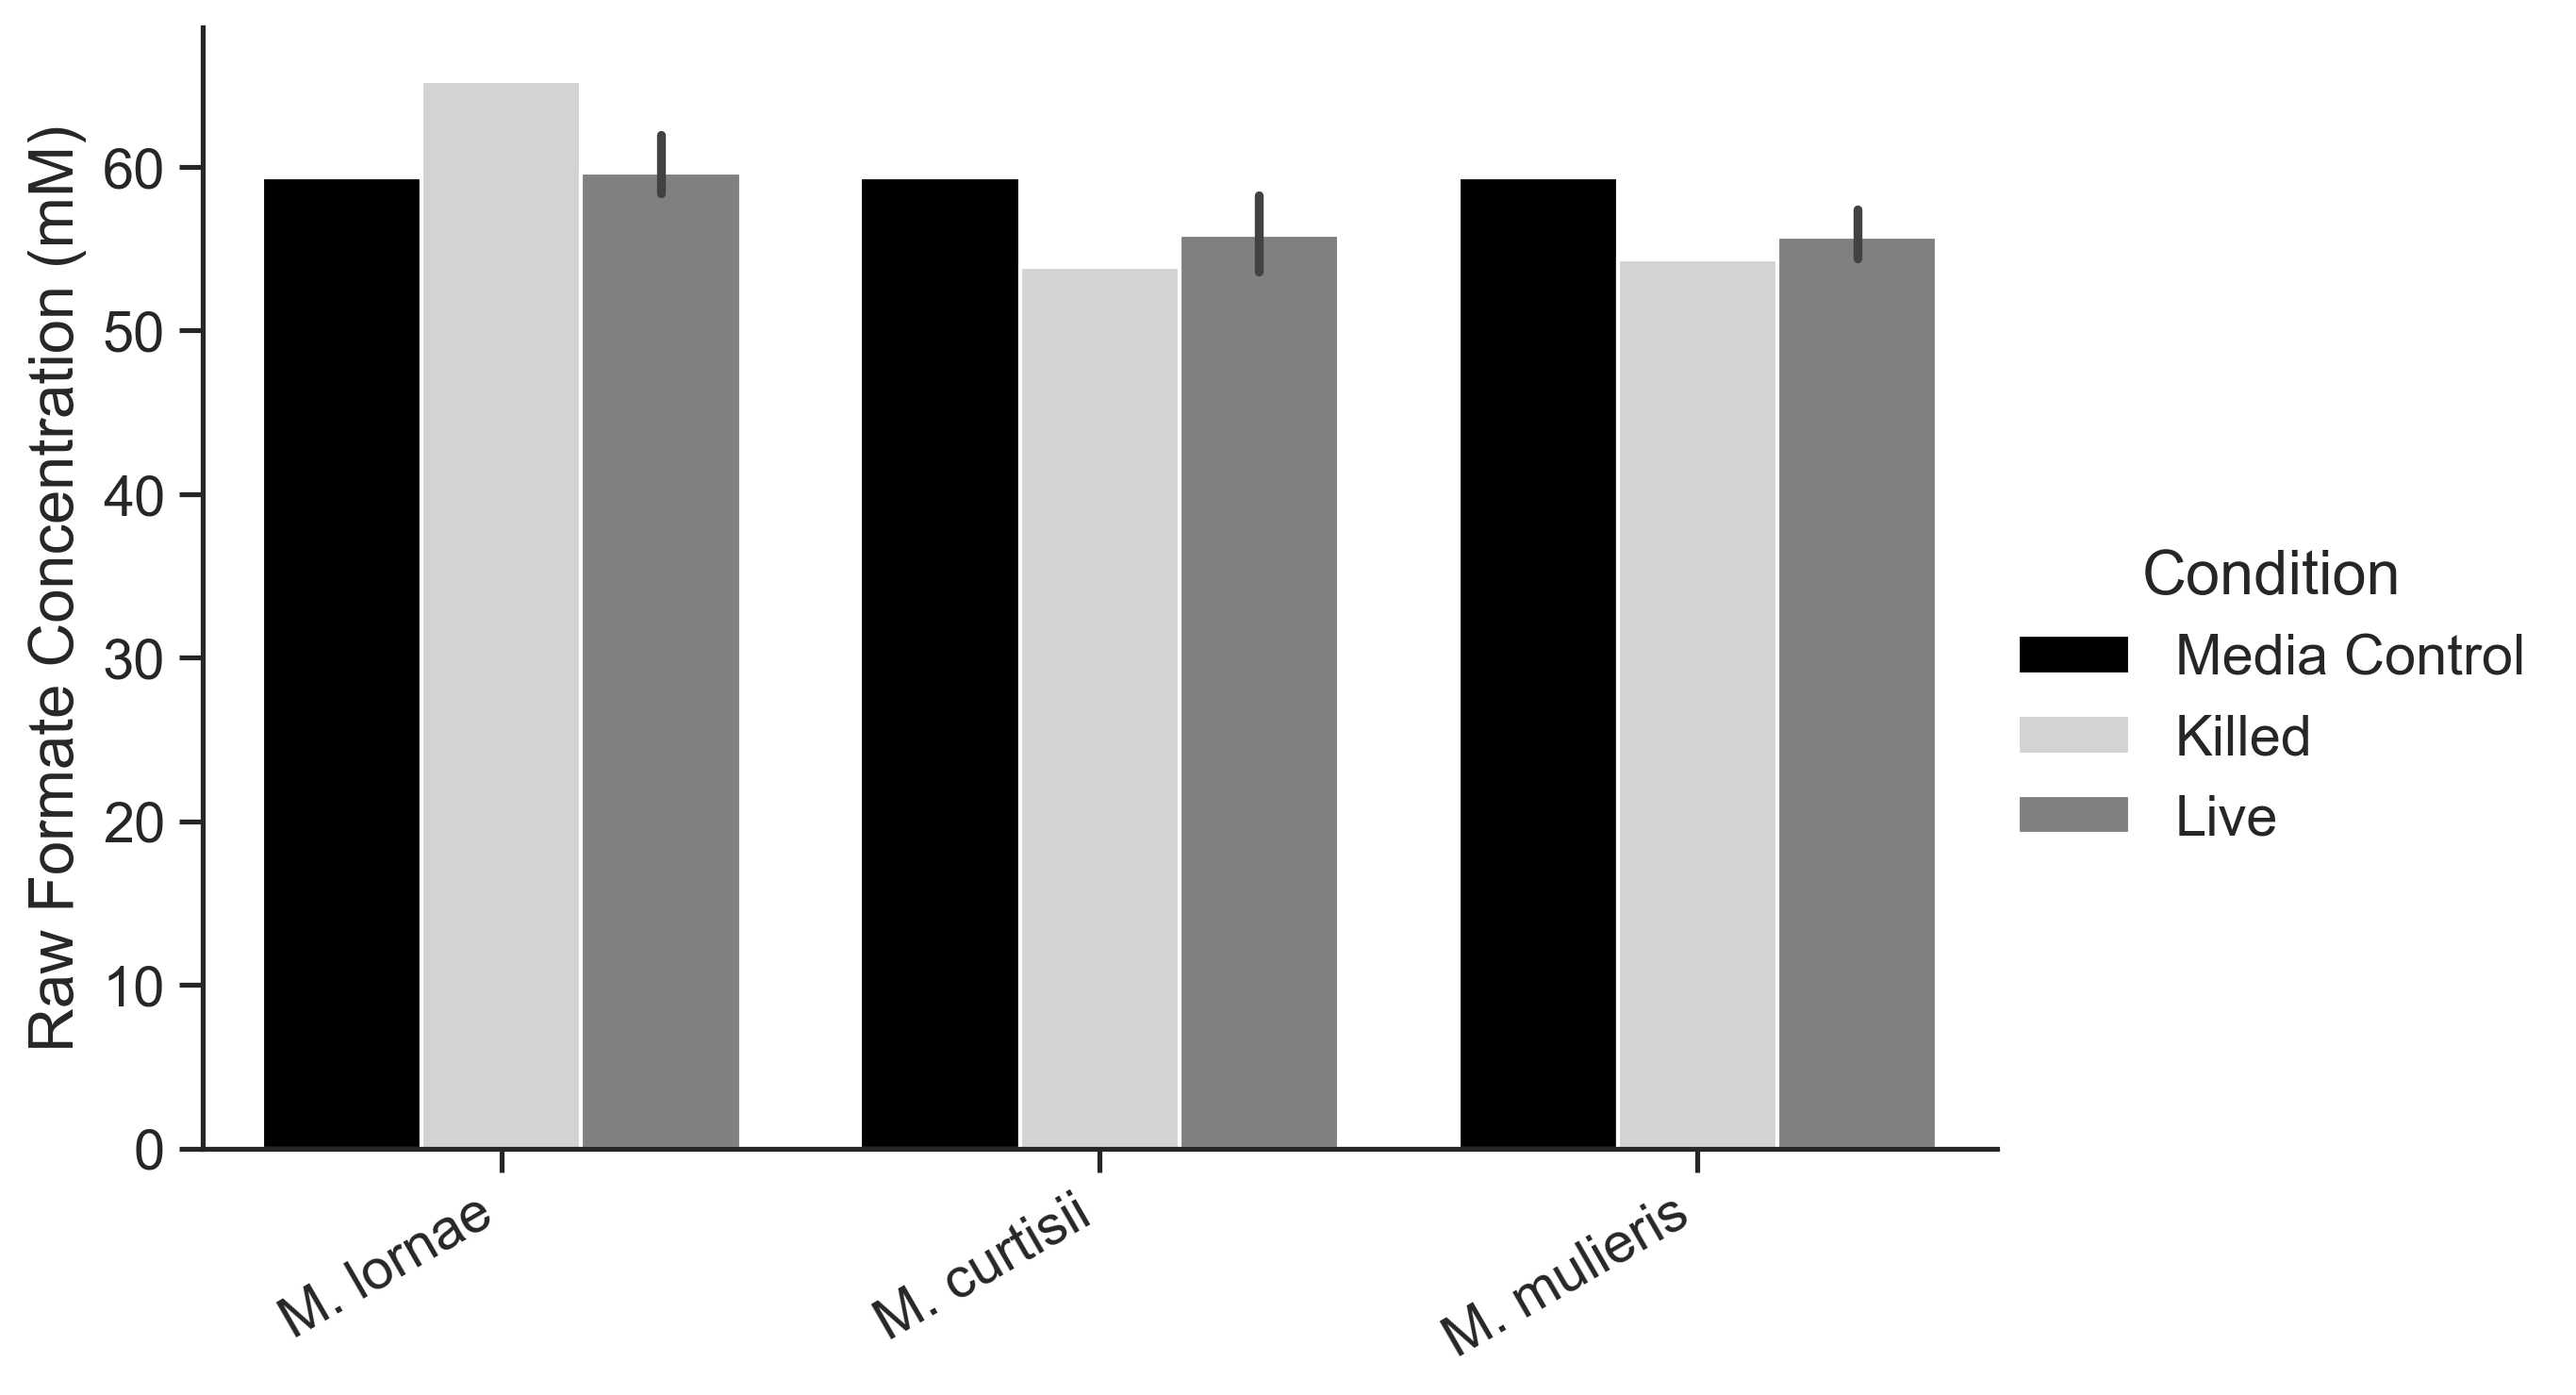

In [109]:
plotPalette = ['black', 'lightgray', 'gray']
plotDepl2524 = sns.catplot(data=data2924depl, x='Isolate', y='Measured Formate Concentration', hue='Condition', kind='bar',aspect=1.5, palette=plotPalette)
plotDepl2524.set(xlabel='', ylabel='Raw Formate Concentration (mM)')
plotDepl2524.set_xticklabels(rotation=30, ha='right')
plotDepl2524.savefig(figPath.joinpath('2-9-24_formate_depletion_concentrations.png'), bbox_inches='tight', dpi=300)

In [12]:
dataAgg2624 = pd.read_csv(analysisPath.joinpath('2-6-24_formate_depletion_aggregated.csv'))

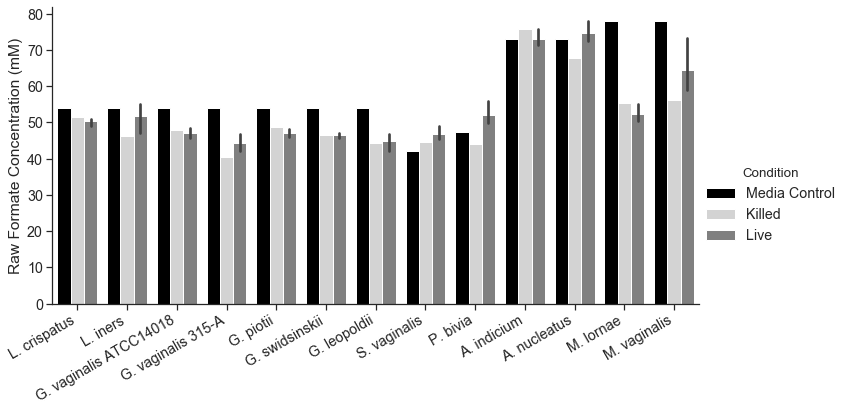

In [16]:
plotPalette = ['black', 'lightgray', 'gray']
plot2624 = sns.catplot(data=dataAgg2624, x='Isolate', y='Measured Formate Concentration', hue='Condition', kind='bar',aspect=2, palette=plotPalette)
plot2624.set(xlabel='', ylabel='Raw Formate Concentration (mM)')
plot2624.set_xticklabels(rotation=30, ha='right')
plot2624.savefig(figPath.joinpath('2-6-24_formate_depletion_concentrations.png'), bbox_inches='tight', dpi=300)

In [14]:
data22524 = pd.read_csv(analysisPath.joinpath('2-25-24_formate_depletion.csv'))

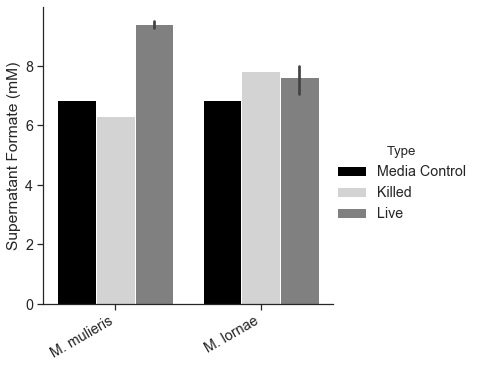

In [18]:
plotPalette = ['black', 'lightgray', 'gray']
plot22524 = sns.catplot(data=data22524, x='Species', y='Formate (mM)', hue='Type', kind='bar',aspect=1, palette=plotPalette)
plot22524.set(xlabel='', ylabel='Supernatant Formate (mM)')
plot22524.set_xticklabels(rotation=30, ha='right')
plot22524.savefig(figPath.joinpath('2-25-24_formate_depletion.png'), bbox_inches='tight', dpi=300)

In [4]:
### Formate concentrations in CVL

In [5]:
data2724 = pd.read_csv(analysisPath.joinpath('2-7-24_cvl_formate.csv'))

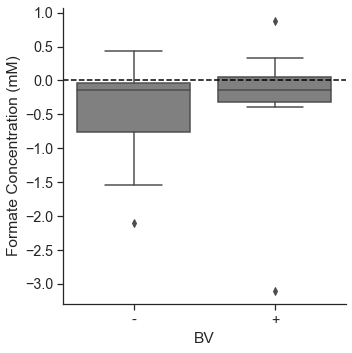

In [6]:
plot2724 = sns.catplot(data=data2724, x='BV', y='Formate', kind='box', color='gray')
plot2724.set(ylabel='Formate Concentration (mM)')
plt.axhline(0, ls='--', color='black')
plot2724.savefig(figPath.joinpath('2-7-27_cvl_formate.png'), bbox_inches='tight', dpi=300)

In [7]:
data21224 = pd.read_csv(analysisPath.joinpath('2-12-24_cvl_formate.csv'))

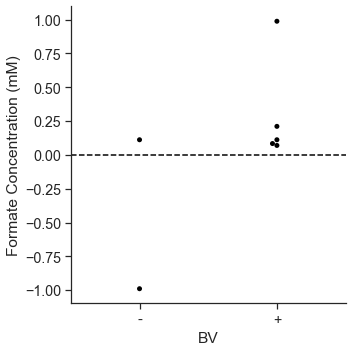

In [8]:
plot21224 = sns.catplot(data=data21224, x='BV', y='Formate', kind='swarm', color='black')
plot21224.set(ylabel='Formate Concentration (mM)')
plt.axhline(0, ls='--', color='black')
plot21224.savefig(figPath.joinpath('2-12-27_cvl_formate.png'), bbox_inches='tight', dpi=300)

In [11]:
data21524 = pd.read_csv(analysisPath.joinpath('2-15-24_formate_cvl.csv'))

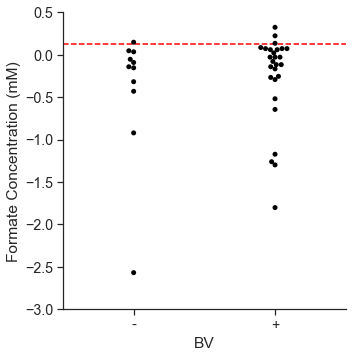

In [15]:
plot21524 = sns.catplot(data=data21524, x='BV', y='Formate', kind='swarm', color='black')
plot21524.set(ylabel='Formate Concentration (mM)', ylim=(-3, 0.5))
plt.axhline(0.128, ls='--', color='red')
plot21524.savefig(figPath.joinpath('2-15-24_cvl_formate.png'), bbox_inches='tight', dpi=300)

In [7]:
aggregateCvlData = pd.read_csv(analysisPath.joinpath('aggregate_formate_in_cvl.csv'))

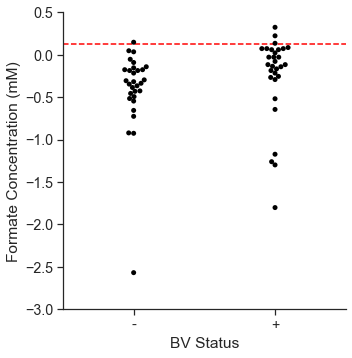

In [9]:
plotAggCvl = sns.catplot(data=aggregateCvlData, x='BV', y='Formate', kind='swarm', color='black')
plotAggCvl.set(ylabel='Formate Concentration (mM)', xlabel='BV Status', ylim=(-3, 0.5))
plt.axhline(0.128, ls='--', color='red')
plotAggCvl.savefig(figPath.joinpath('cvl_formate_aggregate.png'), bbox_inches='tight', dpi=300)

In [12]:
# Make a plot just showing the formate concentrations for CVL samples with detectable levels of formate
detectableCvlDict = {'Sample':[], 'BV':[], 'Formate':[]}
for index, row in aggregateCvlData.iterrows():
    detectableCvlDict['Sample'].append(row['Sample'])
    detectableCvlDict['BV'].append(row['BV'])
    if float(row['Formate']) < 0.128:
        detectableCvlDict['Formate'].append(0.08)
    else:
        detectableCvlDict['Formate'].append(row['Formate'])

In [111]:
### Adding formate but not FDH to CVL to see if there's any FDH activity in the CVL samples
data2824 = pd.read_csv(analysisPath.joinpath('2-8-24_cvl_fdh.csv'))

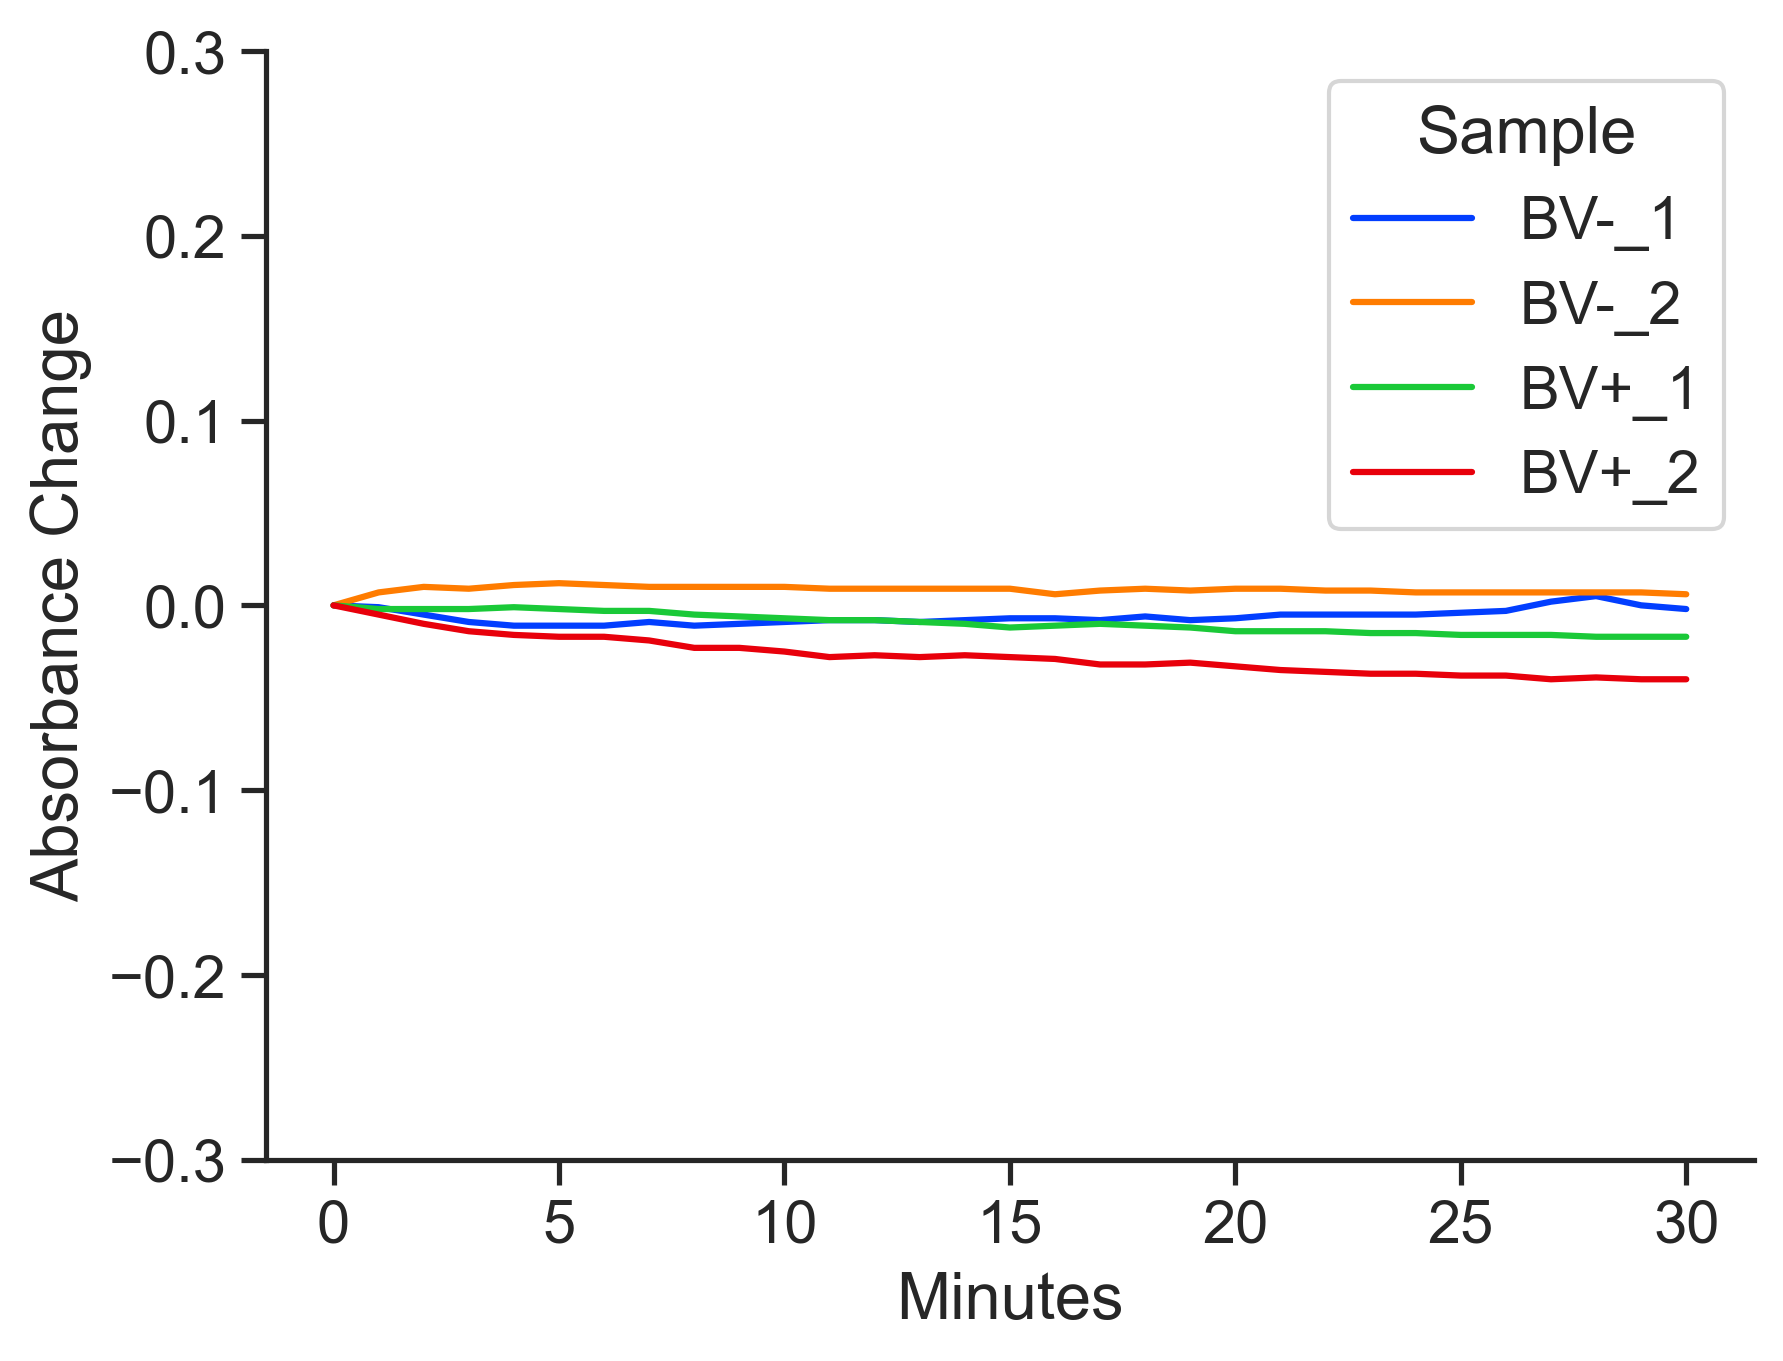

In [117]:
plot2824 = sns.lineplot(data=data2824, x='Minutes', y='Absorbance Change', hue='Sample')
plot2824.set(ylim=(-0.3, 0.3))
sns.despine()
saveFig(plot2824, figPath.joinpath('2-8-24_cvl_fdh.png'))

In [118]:
### Adding pyruvate into samples to see if there's any PFL activity
data2924pfl = pd.read_csv(analysisPath.joinpath('2-9-24_cvl_pfl.csv'))

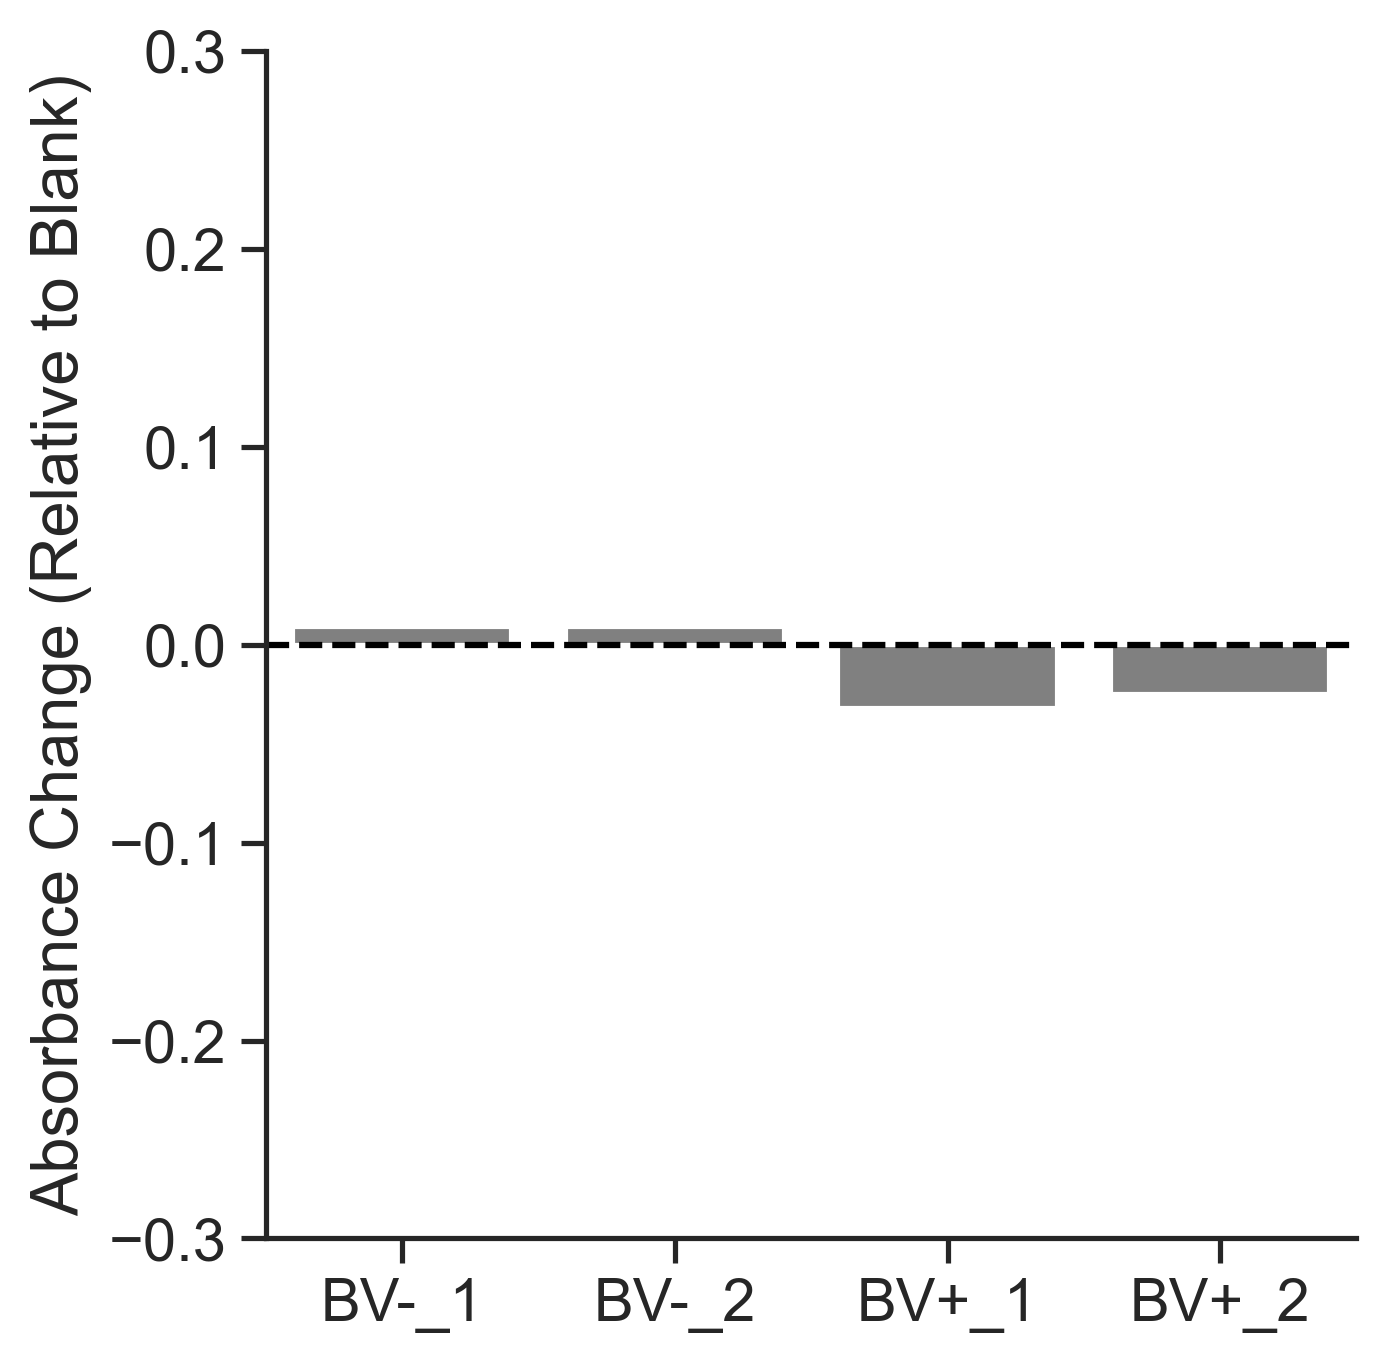

In [123]:
plot2924pfl = sns.catplot(data=data2924pfl, x='Sample', y='Absorbance Change (Relative to Blank)', kind='bar', color='gray')
plot2924pfl.set(ylim=(-0.3, 0.3), xlabel='')
plt.axhline(0, ls='--', color='black')
plot2924pfl.savefig(figPath.joinpath('2-9-24_cvl_pfl.png'), bbox_inches='tight', dpi=300)

In [43]:
### Testing whether catalase in CVL/softcup samples can decompose formate in the presence of H2O2
data3324 = pd.read_csv(analysisPath.joinpath('3-3-24_h2o2.csv'))

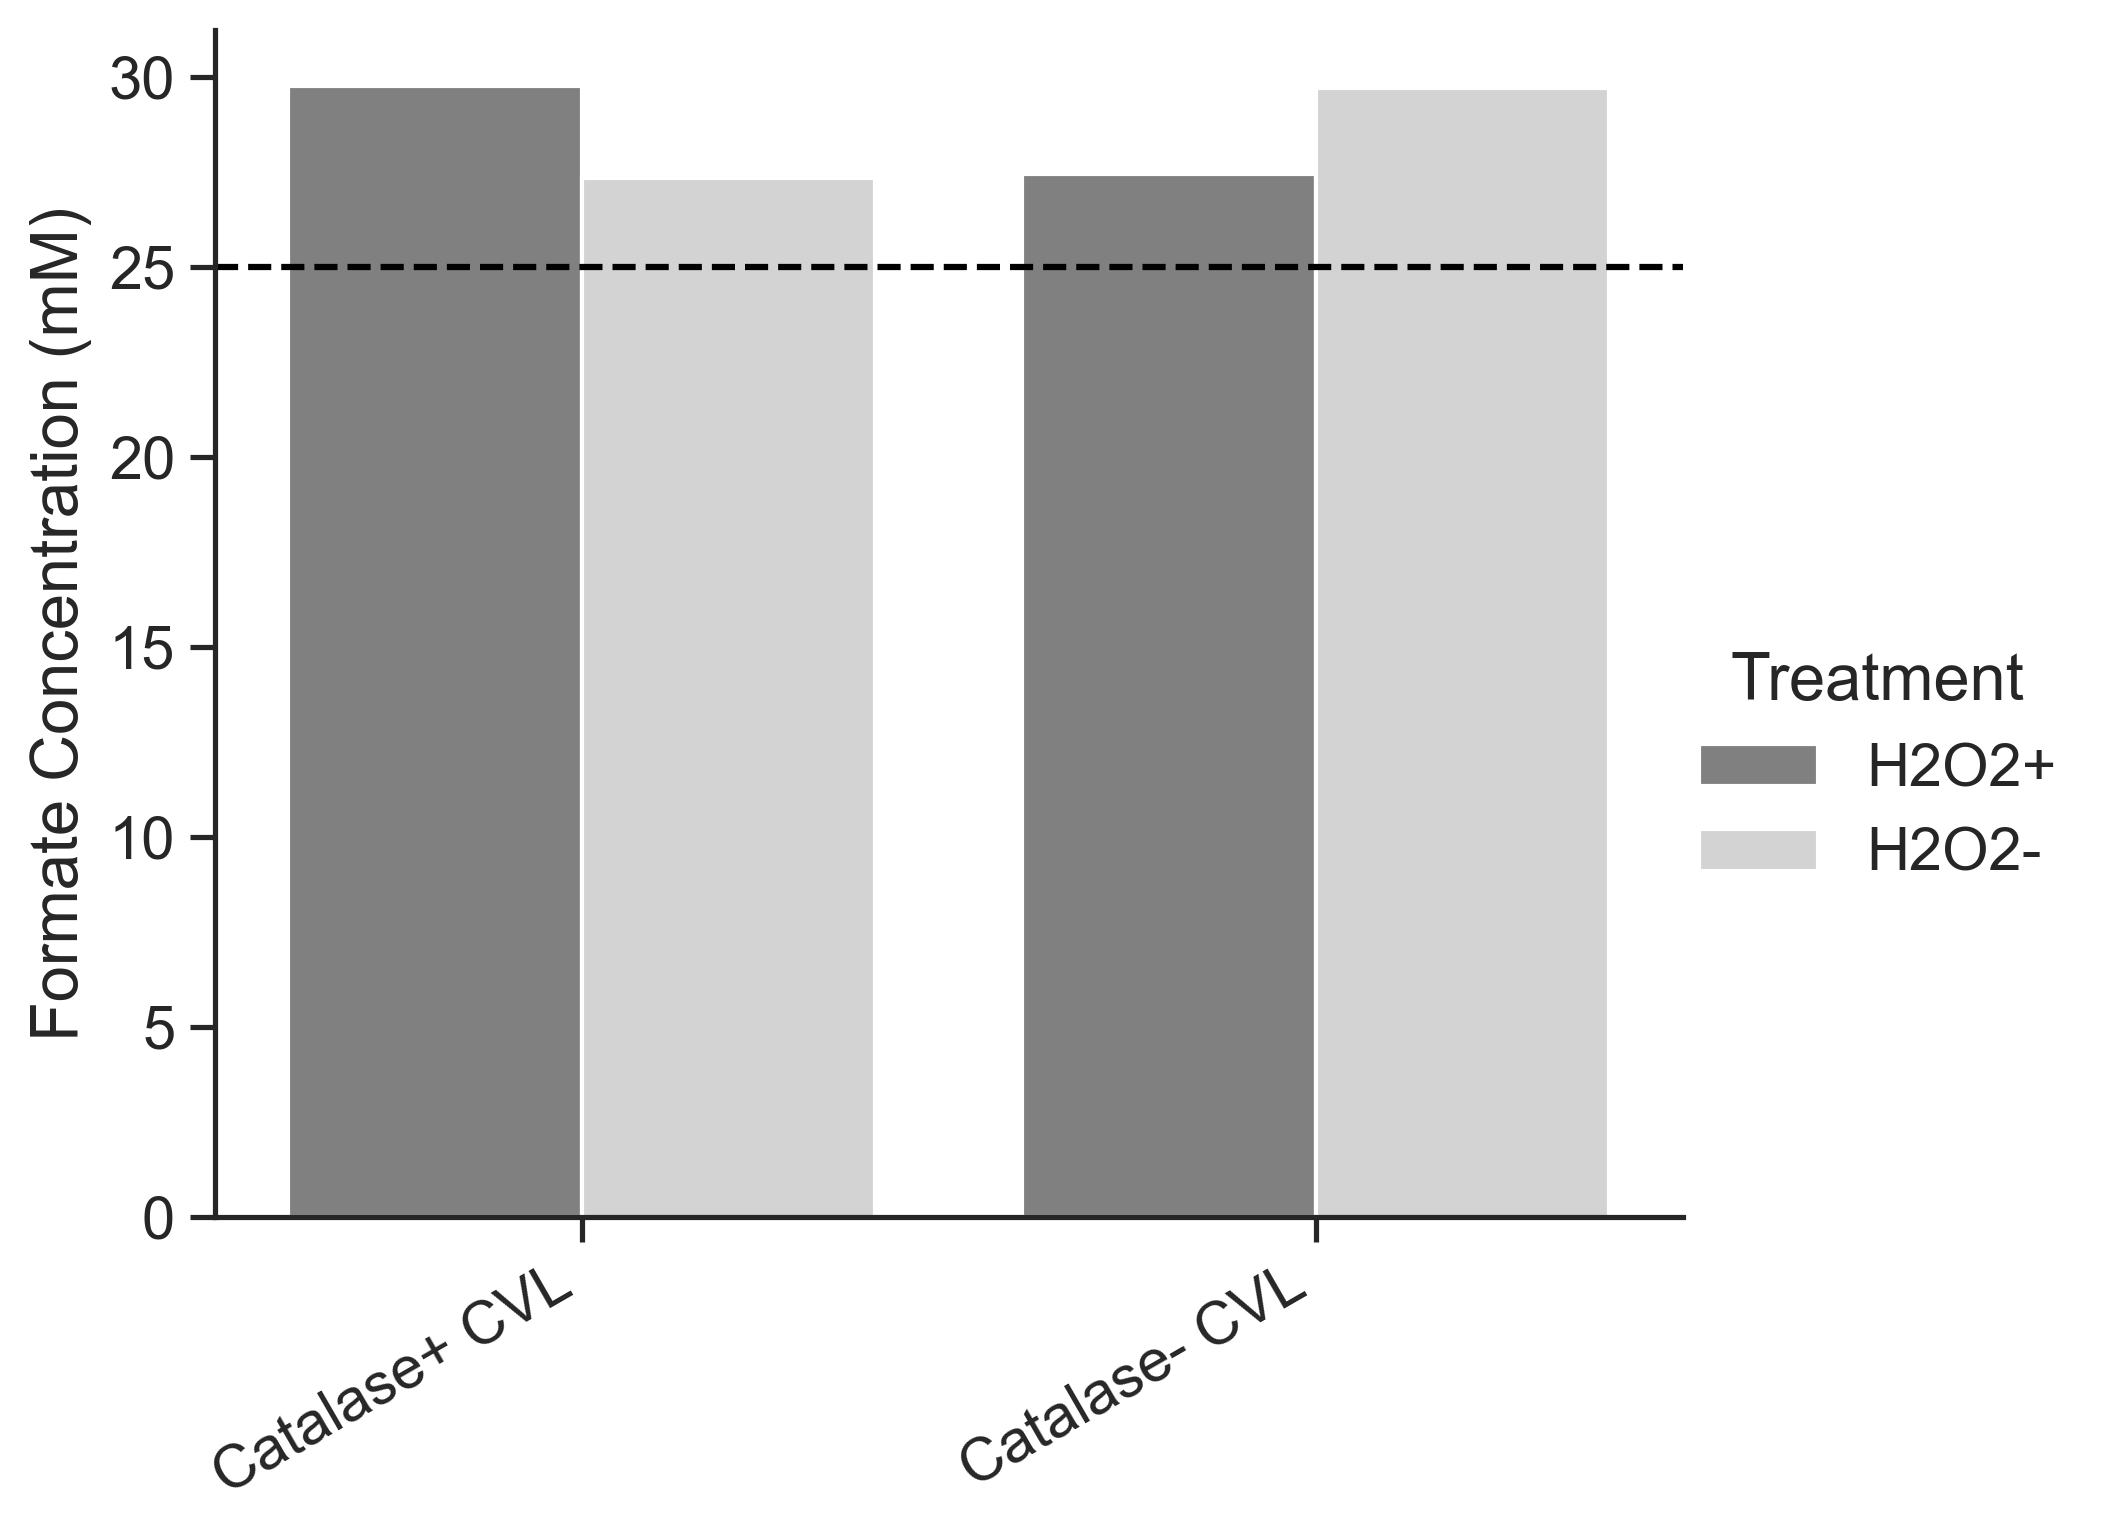

In [48]:
plotPalette = ['gray', 'lightgray']
plot3324 = sns.catplot(data=data3324, x='Sample', y='Formate', hue='Treatment', kind='bar',aspect=1.2, palette=plotPalette)
plot3324.set(xlabel='', ylabel='Formate Concentration (mM)')
plot3324.set_xticklabels(rotation=30, ha='right')
plt.axhline(25, ls='--', color='black')
plot3324.savefig(figPath.joinpath('3-3-24_formate_depletion_h2o2.png'), bbox_inches='tight', dpi=300)